In [87]:
#Import Data (Raw Data)
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
%matplotlib inline

# #TO EXCEL
from pandas import ExcelWriter #Import excel file library
import os

xl_files = []
dataDir='RawData/AG 5/Resultb/'
nameForImage = 'Rogue AG_5mo_all'

filesA = [f for f in os.listdir(dataDir) if f.endswith('.' + 'xlsx')]
# xl_files = filesA.remove('CalInputFile.csv')
# files = sorted(files, key=lambda x: float(x.split('.')[0]))
# files = sorted(files, key=lambda x: x.split('.')[0])

xl_files = [x[:-5] for x in filesA]
        
print(xl_files)
# xl_files.pop(1)   #remove last filename with bad data
# print(xl_files)


['AG-01 H7T54', 'AG-02 H7T37', 'AG-03 H7T03', 'AG-04 H6T71', 'AG-06 H7T07', 'AG-07 H7T33', 'AG-08 H7T41', 'AG-09 H7T17', 'AG-10 H7T62', 'AG-11 H7T30', 'AG-12 H7T47', 'AG-13 H7T36', 'AG-15 H7T71', 'AG-17 H7T11', 'AG-18 H7T45', 'AG-19 H7T55', 'AG-20 H7T42', 'AG-21 H7T70', 'AG-24 H7T16', 'AG-24 H7T18', 'AG-26 H7T22', 'AG-27 H7T44', 'AG-28 H7T32', 'AG-29 H7T56', 'AG-30 H7T25', 'AG-31 H7T69', 'AG-32 H7T65', 'AG-33 H7T78', 'AG-34 H7T72', 'AG-35 H7T26', 'AG-36 H7T58', 'AG-37 H7T29', 'AG-38 H7T21', 'AG-39 H7T13']


In [88]:
    
maxDegrees=35.09  # to manually set;  will redefine below from dataframe of all sprayers

# result.empty
# del result
result =pd.DataFrame()
for i in range(len(xl_files)):
    joinedfilename = dataDir + xl_files[i] + '.xlsx'
#     df1 = pd.read_excel(xl_files[i],sheet_name='Sheet2')
#     df1 = pd.read_excel(joinedfilename,sheet_name='StrokeReport')
    df1 = pd.read_excel(joinedfilename,sheet_name='Sheet2')
    #df2 = pd.read_excel('f1t1.xlsx',sheet_name='Sheet2')
#     df1['Deg/Sec']=df1['SPM']*df1['degrees']/60
    df1.rename(columns={'angvelocity': 'Deg/Sec'}, inplace=True)    
#     df1['%Pull']=df1['degrees']/maxDegrees*100  # redefine once new maxdegrees of all data defined
    df1['sprayer']=xl_files[i]
    df1['SPM_Calc']=1/(df1['fduration']*2/60)
    df1['Sprayer_color']=i/100*2+.1
    result = pd.concat([result,df1], sort=True)
    
    print(xl_files[i])

# excelextension = '.xlsx'
# exceljoinedfilename = 'totalxl'+excelextension
# writer = ExcelWriter(exceljoinedfilename) #set file name


# result.to_excel(writer,'Sheet2') #Write df4 data table to sheet 1 of file
# writer.save() #save file

# print(result)

AG-01 H7T54
AG-02 H7T37
AG-03 H7T03
AG-04 H6T71
AG-06 H7T07
AG-07 H7T33
AG-08 H7T41
AG-09 H7T17
AG-10 H7T62
AG-11 H7T30
AG-12 H7T47
AG-13 H7T36
AG-15 H7T71
AG-17 H7T11
AG-18 H7T45
AG-19 H7T55
AG-20 H7T42
AG-21 H7T70
AG-24 H7T16
AG-24 H7T18
AG-26 H7T22
AG-27 H7T44
AG-28 H7T32
AG-29 H7T56
AG-30 H7T25
AG-31 H7T69
AG-32 H7T65
AG-33 H7T78
AG-34 H7T72
AG-35 H7T26
AG-36 H7T58
AG-37 H7T29
AG-38 H7T21
AG-39 H7T13


In [89]:
#Convert datetime column to Pandas DateTime Format

# df2=result2  # rename to accommodate code
# df2['datetime'] =  pd.to_datetime(df2['datetime'], format='%m/%d/%y %H:%M:%S.%f') #converting data type
# print(result)
result1=result.copy() #copy to new
result1['datetime'] =  pd.to_datetime(result1['datetime'], format='%m/%d/%y %H:%M:%S.%f') #converting data type
print(result1)

        Deg/Sec LegID  SPM    SPM_Calc  Sprayer_color   TimeID  Unnamed: 0  \
0           NaN    AG  NaN         NaN           0.10  Month 5           0   
1     99.912037    AG  NaN  111.049035           0.10  Month 5          48   
2     98.491899    AG  NaN  111.049035           0.10  Month 5         104   
3     79.645364    AG  NaN   85.666398           0.10  Month 5         168   
4     92.128477    AG  NaN   99.944131           0.10  Month 5         293   
5     85.284209    AG  NaN   90.858301           0.10  Month 5         360   
6           NaN    AG  NaN         NaN           0.10  Month 5         540   
7           NaN    AG  NaN         NaN           0.10  Month 5        4004   
8           NaN    AG  NaN         NaN           0.10  Month 5        5005   
9           NaN    AG  NaN         NaN           0.10  Month 5        6006   
10          NaN    AG  NaN         NaN           0.10  Month 5        7007   
11          NaN    AG  NaN         NaN           0.10  Month 5  

In [90]:
#filter by date time  --- 
# first_time = pd.to_datetime('2018-10-16')
# first_time = pd.to_datetime('2019-06-18')
# first_time = pd.to_datetime('2019-09-20')
first_time = pd.to_datetime('2019-10-20')
print(first_time)
# second_time = pd.to_datetime('2018-11-16')
# second_time = pd.to_datetime('2019-07-19')
# second_time = pd.to_datetime('2019-10-23')
second_time = pd.to_datetime('2019-11-23')
print(second_time)


mask = (result1['datetime'] > first_time) & (result1['datetime'] <= second_time)
result1 = result1.loc[mask].copy()
# print(result1)

2019-10-20 00:00:00
2019-11-23 00:00:00


In [91]:
# filter out results from bad sensor data

#remove SPM column since it is blank from some issue with preprocessing
result2 = result1.replace('', np.nan,regex=True)
result2=result2.drop(['SPM'],axis=1)

#remove rows with blank data aka wake/sleep rows
result2=result2.dropna(axis=0, thresh =6)

maxDegrees = result2['degrees'].max()    #assume at least one pull in all data was 100%
print('max degrees = ',maxDegrees)
result2['%Pull']=result2['degrees']/maxDegrees*100
                     
# result2=result2.dropna(axis=0,how=any,thresh=5,inplace=False)
# result2 = result2[result2['SPM_Calc']<500]
result2 = result2[result2['degrees']>5]
result2 = result2[result2['Deg/Sec']<200]
# result2 = result2[result2['Deg/Sec']>90]
result2 = result2[result2['fduration']<3] 
# result2 = result2[result2['degrees']<12]


excelextension = '.xlsx'
exceljoinedfilename = 'totalxl'+excelextension
writer = ExcelWriter(exceljoinedfilename) #set file name
result.to_excel(writer,'prefilter') #Write df4 data table to sheet 1 of file
result2.to_excel(writer,'Filtered') #Write df4 data table to sheet 1 of file
writer.save() #save file

# print(result2)
# print(result2)


max degrees =  34.89797510068583


In [92]:
totalmedian = result2['spraydirectionscore'].median()
print(totalmedian)

-45.0


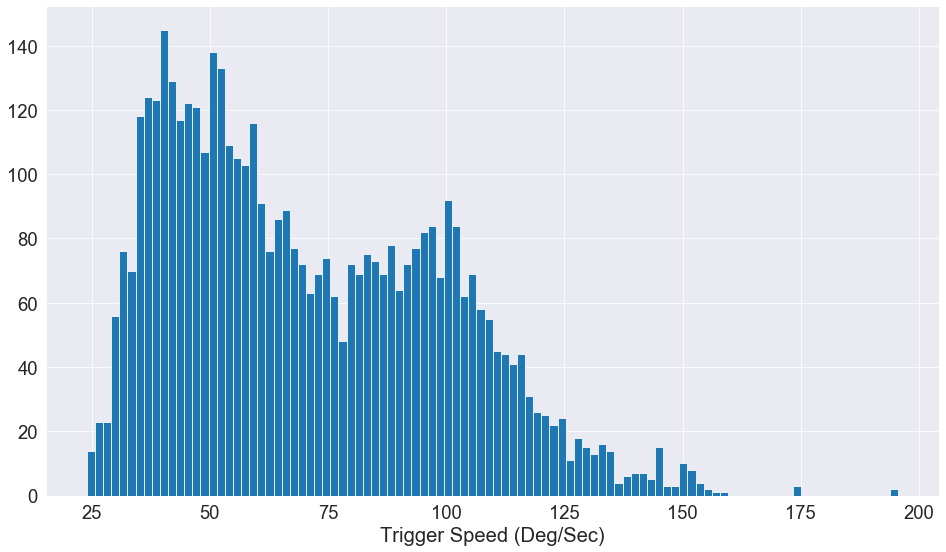

In [93]:

plt.rcParams.update({'font.size': 15})

n_bins = 100
x_hist=result2['Deg/Sec']
fig, ax = plt.subplots(figsize=(16,9))
n, bins, patches = ax.hist(x_hist, n_bins)

ax.set_xlabel('Trigger Speed (Deg/Sec)')
plt.show()

picname = dataDir + nameForImage + '_trigSpeed_hist' + '.png'
fig.savefig(picname, transparent=True)

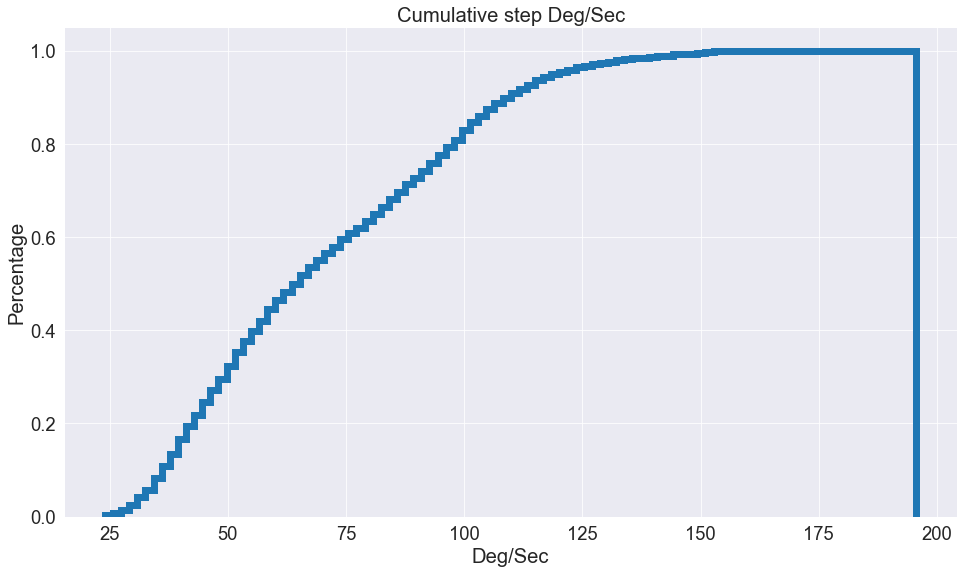

In [94]:

fig, ax = plt.subplots(figsize=(16,9))
n, bins, patches = ax.hist(x_hist, n_bins, density=True, histtype='step', cumulative=True, label='Cumulative',linewidth=7.0)

ax.set_title('Cumulative step Deg/Sec')
ax.set_xlabel('Deg/Sec')
ax.set_ylabel('Percentage')
ax.grid(True)
plt.show()


# picname = dataDir + nameForImage + '_trigSpeed_cumulative' + '.png'
# fig.savefig(picname, transparent=True)

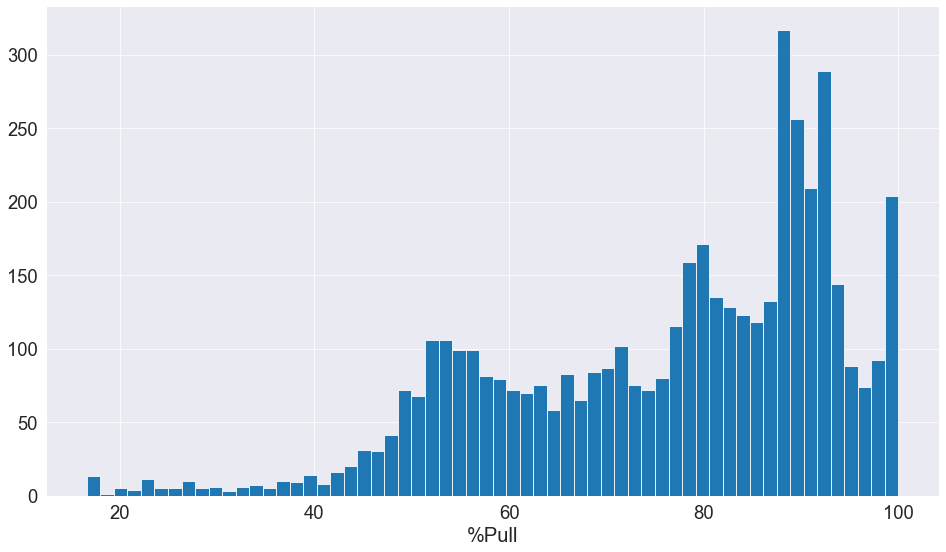

In [95]:
n_bins = 60
x_hist=result2['%Pull']
fig, ax = plt.subplots(figsize=(16,9))
n, bins, patches = ax.hist(x_hist, n_bins)
plt.xlabel('%Pull')
plt.show()


# n_bins = 100
# x_hist=result2['Deg/Sec']
# fig, ax = plt.subplots(figsize=(16,9))
# n, bins, patches = ax.hist(x_hist, n_bins)

# ax.set_xlabel('Trigger Speed (Deg/Sec)')
# plt.show()

picname = dataDir + nameForImage + '_pull_hist' + '.png'
fig.savefig(picname, transparent=True)

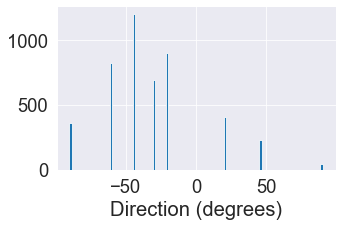

In [96]:
n_bins = 100
x_hist=result2['spraydirectionscore']
plt.figure(figsize=(5,3))
n, bins, patches = plt.hist(x_hist, bins=n_bins,)
plt.xlabel('Direction (degrees)')
plt.show()

# picname = dataDir + nameForImage + '_SprayDirection_Hist' + '.png'
# fig.savefig(picname, transparent=True)

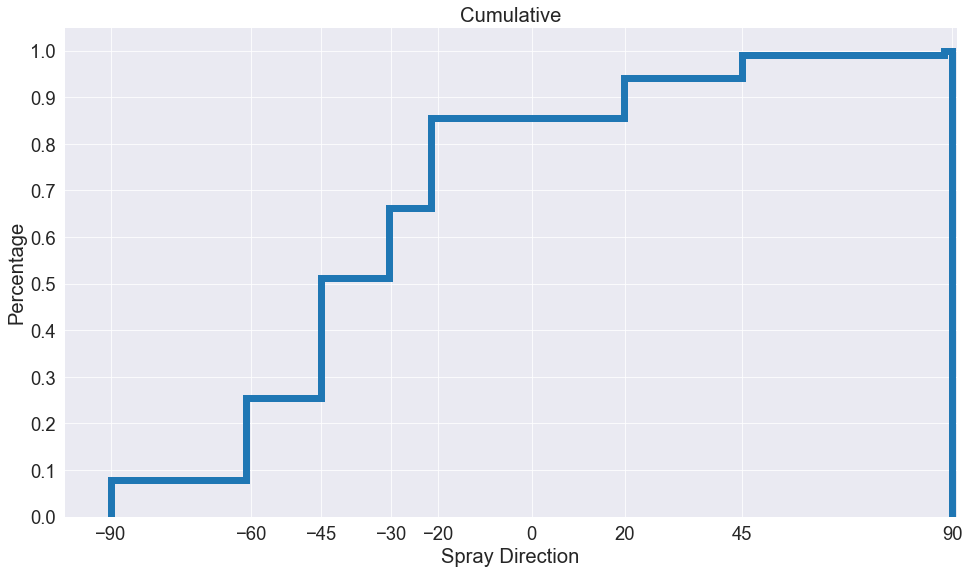

In [97]:

fig, ax = plt.subplots(figsize=(16,9))
n, bins, patches = ax.hist(x_hist, n_bins, density=True, histtype='step', cumulative=True, label='Cumulative',linewidth=7.0)

ax.set_title('Cumulative')
ax.set_xlabel('Spray Direction')
ax.set_xticks([-90,-60,-45,-30,-20,0,20,45,90])
plt.xlim([-100, 91])
plt.yticks(np.arange(0, 1.1, .10))
ax.set_ylabel('Percentage')
ax.grid(True)
plt.show()


picname = dataDir + nameForImage + '_SprayDirection_cumulative' + '.png'
fig.savefig(picname, transparent=True)

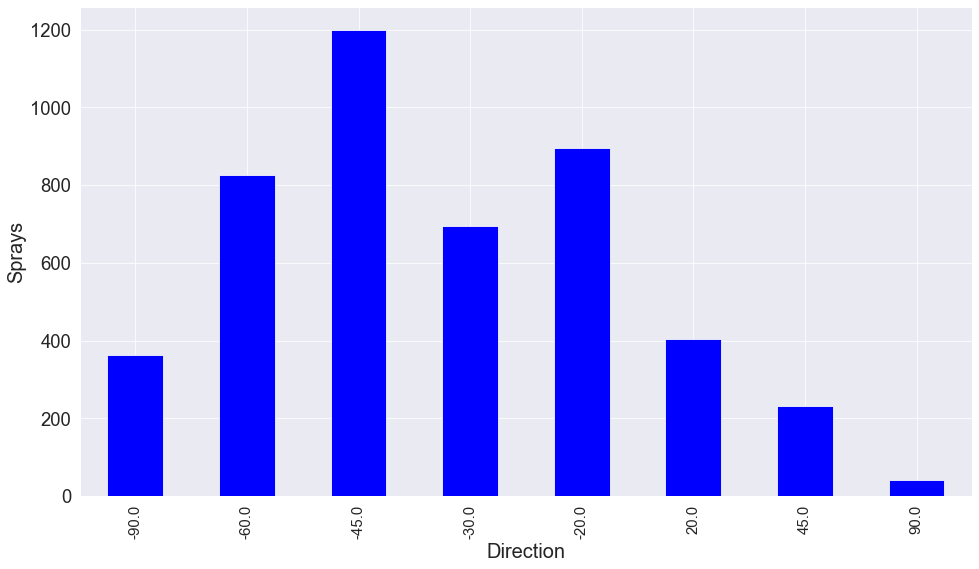

In [98]:

df20 = pd.DataFrame()  #clear any data


df20['spraydirectionscore']=result2['spraydirectionscore'].value_counts()
df20.sort_index(inplace=True)
# print(df20)
                                        
fig, ax = plt.subplots(1,1) #Add subplot to figure
fig.set_size_inches(16,9)

ax = df20['spraydirectionscore'].plot.bar(color="b")
ax.set_ylabel('Sprays',fontsize=20)
ax.set_xlabel('Direction',fontsize=20)
plt.xticks(fontsize=15)

picname = dataDir + nameForImage + '_SprayDirection_Bar' + '.png'
fig.savefig(picname, transparent=True)

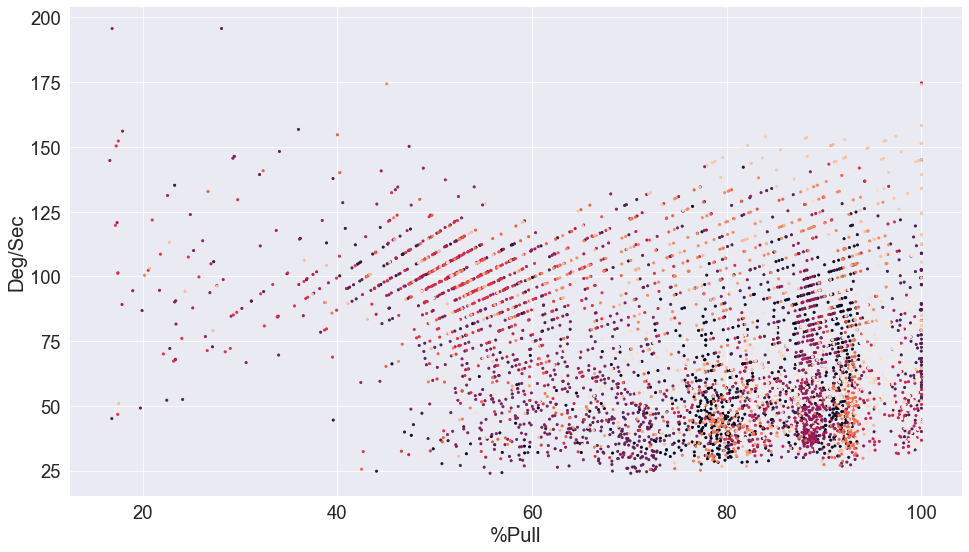

In [99]:
x_name='%Pull'
# x_name='degrees'
y_name='Deg/Sec'
# y_name='Deg/Sec'

x_scat = result2[x_name]
y_scat = result2[y_name]
color_scat = result2['Sprayer_color']

fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.scatter(x_scat,y_scat, s=5, c=color_scat)
fig.set_size_inches(16,9)

ax.set_xlabel(x_name)
ax.set_ylabel(y_name)
plt.show()
# picname = dataDir + nameForImage + '_%pullvTrigSpeed' + '.png'
# fig.savefig(picname, transparent=True)

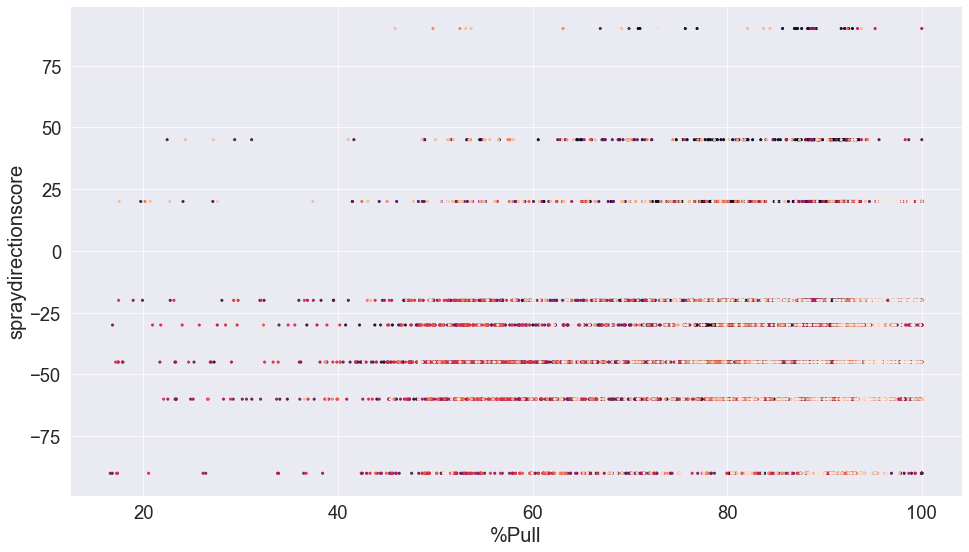

In [100]:
x_name='%Pull'
# x_name='degrees'
y_name='spraydirectionscore'
# y_name='Deg/Sec'

x_scat = result2[x_name]
y_scat = result2[y_name]
color_scat = result2['Sprayer_color']

fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.scatter(x_scat,y_scat, s=5, c=color_scat)
fig.set_size_inches(16,9)

ax.set_xlabel(x_name)
ax.set_ylabel(y_name)
plt.show()
# picname = dataDir + nameForImage + '_%pullvDirection' + '.png'
# fig.savefig(picname, transparent=True)

In [101]:
#Create a date only column

df2=result2  # rename to accommodate code
df2['date'] = df2.datetime.dt.date
# df2.head()

In [102]:
#Create UserID column---remove 5 character sprayer ID from filename

df2['User']=df2['sprayer'].str[:-5]
# df2['User']=pd.to_numeric(df2['User'], errors='coerce')
# ax=sns.jointplot(x="User", y="spraydirectionscore", data=df2, kind='kde',size=10)

# picname = dataDir + nameForImage + '_directionScore_joint' + '.png'
# ax.savefig(picname)
 


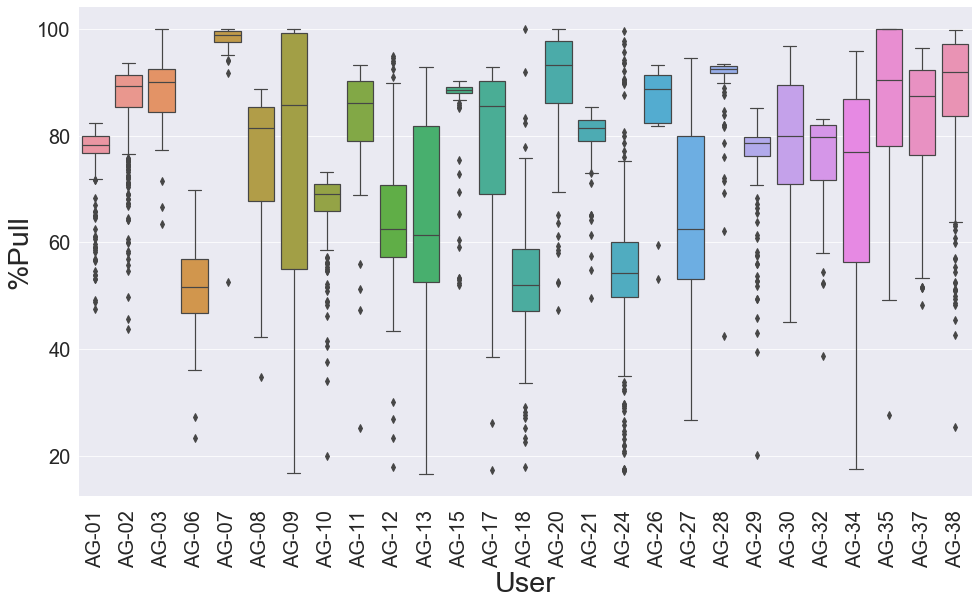

In [103]:
sns.set_context("paper", font_scale=3)
sns.set_style("darkgrid")

# plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,1) #Add subplot to figure
fig.set_size_inches(16,9)
ax = sns.boxplot(x="User", y="%Pull", data=df2)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(rotation=0,fontsize=20)

sns.despine(trim=True, left=True)

picname = dataDir + nameForImage + '_%Pull_Box' + '.png'
fig.savefig(picname, transparent=True)


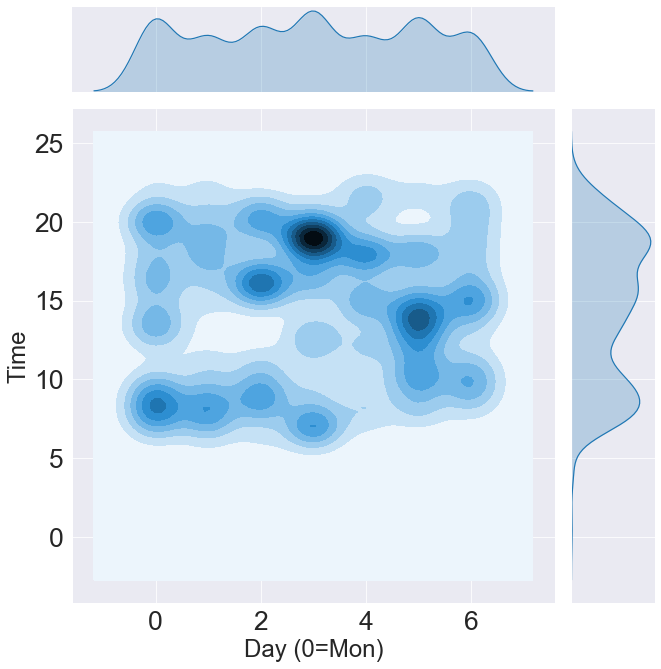

In [104]:


df2['weekday'] = df2['datetime'].dt.dayofweek
df2['hour'] = df2['datetime'].dt.hour
# print(df2)
ax=sns.jointplot(x="weekday", y="hour", data=df2, kind="kde",height=10)
ax.set_axis_labels('Day (0=Mon)', 'Time', fontsize=24)

picname = dataDir + nameForImage + '_DayOfWeek_joint' + '.png'
ax.savefig(picname)
 



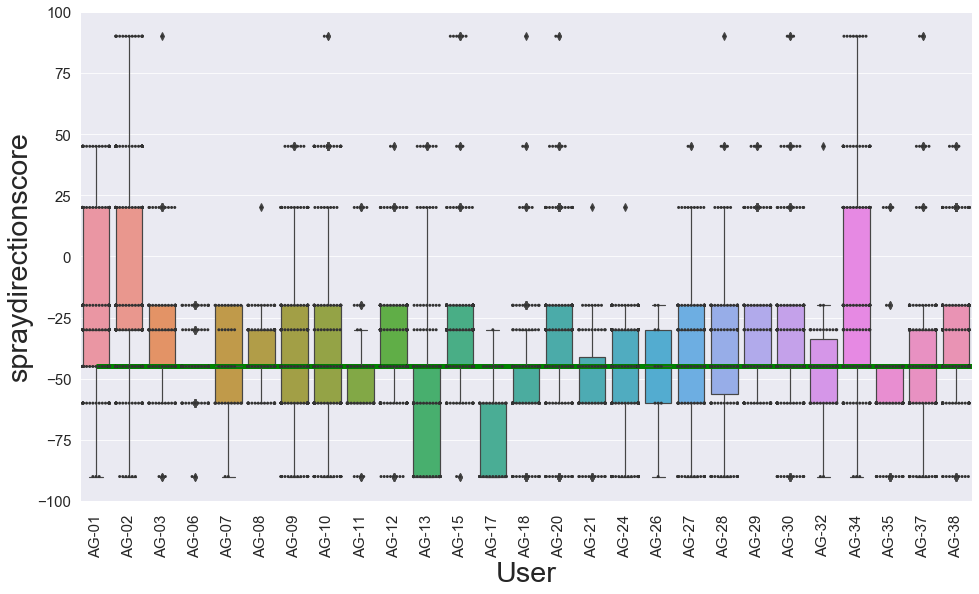

In [105]:
# import seaborn as sns
# import matplotlib.pyplot as plt #Import library

# plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.hlines(totalmedian, 0, 50,linewidth=5,color='green')
fig.set_size_inches(16,9)

ax=sns.boxplot(x="User", y="spraydirectionscore", data=df2)
ax=sns.swarmplot(x="User", y="spraydirectionscore", data=df2, color=".2", size=3)
ax.set_ylim([-100, 100])
# ax.set_xlabel('User',fontsize=15)

plt.xticks(rotation=90,fontsize=15)
plt.yticks(rotation=0,fontsize=15)

picname = dataDir + nameForImage + '_SprayDirection_Box' + '.png'
fig.savefig(picname, transparent=True)

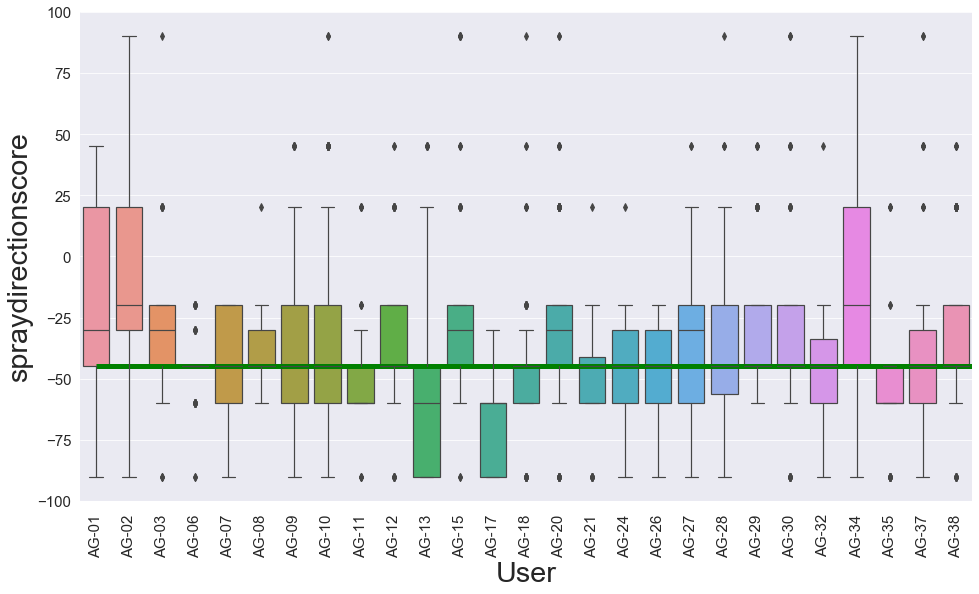

In [106]:

fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.hlines(totalmedian, 0, 50,linewidth=5,color='green')
fig.set_size_inches(16,9)

ax = sns.boxplot(x="User", y="spraydirectionscore", data=df2)
ax.set_ylim([-100, 100])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

sns.despine(trim=True, left=True)

picname = dataDir + nameForImage + '_SprayDirection_Box2' + '.png'
fig.savefig(picname, transparent=True)




Mean of all Users =  -38.2461705013612


(array([-80., -70., -60., -50., -40., -30., -20., -10.,   0.]),
 <a list of 9 Text yticklabel objects>)

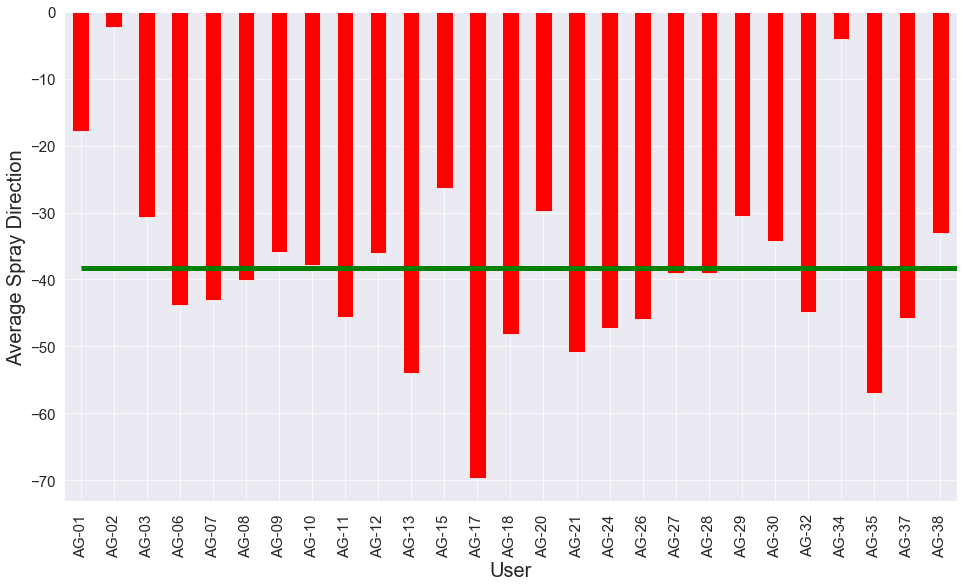

In [107]:
df10 = pd.DataFrame()  #clear any data

df10 = df2.spraydirectionscore.groupby(df2["User"]).mean()

meanByUser=df10.mean()
# print(df10)
print('Mean of all Users = ',meanByUser)

fig, ax = plt.subplots(1,1) #Add subplot to figure
fig.set_size_inches(16,9)
plt.hlines(meanByUser, 0, 53,linewidth=5,color='green')
ax = df10.plot.bar(color="r")
ax.set_ylabel('Average Spray Direction',fontsize=20)
ax.set_xlabel('User',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# picname = dataDir + nameForImage + '_DirectionByUser_Avg' + '.png'
# fig.savefig(picname, transparent=True)

Median of all Users =  -45.0


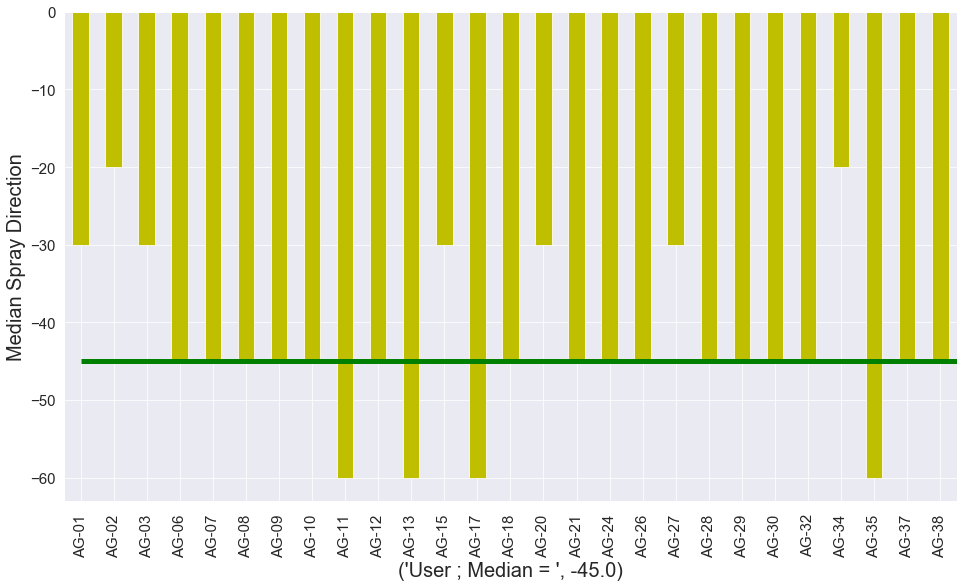

In [108]:
df11 = pd.DataFrame()  #clear any data

df11 = df2.spraydirectionscore.groupby(df2["User"]).median()

medianByUser=df11.median()
# print(df10)
print('Median of all Users = ',medianByUser)

fig, ax = plt.subplots(1,1) #Add subplot to figure
fig.set_size_inches(16,9)
plt.hlines(medianByUser, 0, 53,linewidth=5,color='green')
ax = df11.plot.bar(color="y")
ax.set_ylabel('Median Spray Direction',fontsize=20)
ax.set_xlabel('User',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
xtext='User ; Median = ', medianByUser
ax.set_xlabel(xtext,fontsize=20)


# medianByUser=df10.mean()
# print(df10)
# print('Median of all Users = ',medianByUser)

picname = dataDir + nameForImage + '_DirectionByUser_Median' + '.png'
fig.savefig(picname, transparent=True)

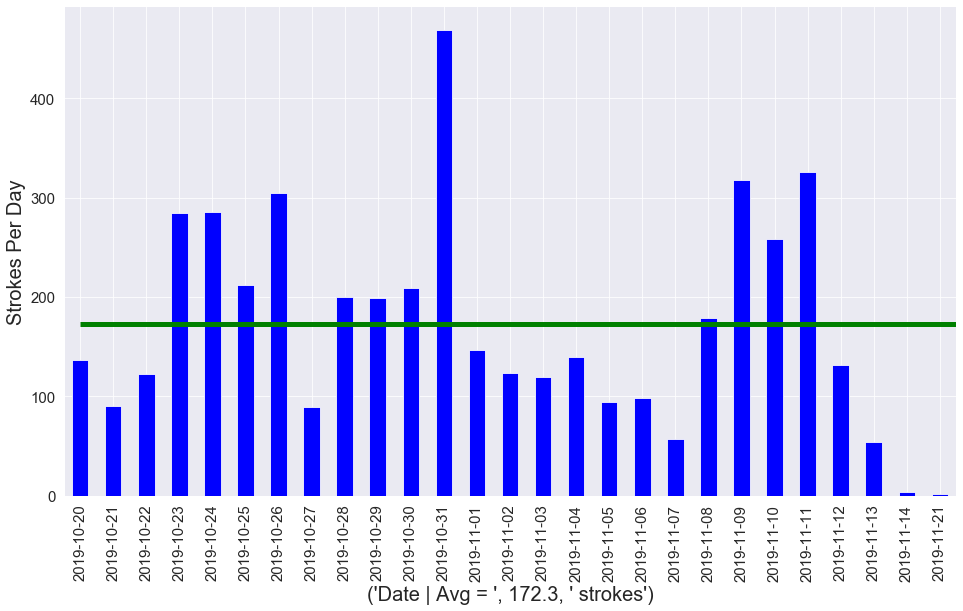

In [109]:

value = 1000

df2['countbinary']=1
df2['month'] = df2['datetime'].dt.month
df2['day'] = df2['datetime'].dt.day

fig, ax = plt.subplots(1,1) #Add subplot to figure
fig.set_size_inches(16,9)

# df2.countbinary.groupby([df2["datetime"].dt.month, df2["datetime"].dt.day]).count().plot(kind='bar')
# df3 = df2.countbinary.groupby([df2['datetime'].dt.month, df2['datetime'].dt.day]).count()
df3 = df2.countbinary.groupby([df2['date']]).count()
avgStrokesperDay = round(df3.mean(),1)

ax = df3.plot.bar(color="b")
plt.hlines(avgStrokesperDay, 0, 53,linewidth=5,color='green')
ax.set_ylabel('Strokes Per Day',fontsize=20)
xText='Date | Avg = ',avgStrokesperDay,' strokes'
ax.set_xlabel(xText,fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

picname = dataDir + nameForImage + '_StrokesPerDay_Total' + '.png'
fig.savefig(picname, transparent=True)


avg mass per day =  145.9


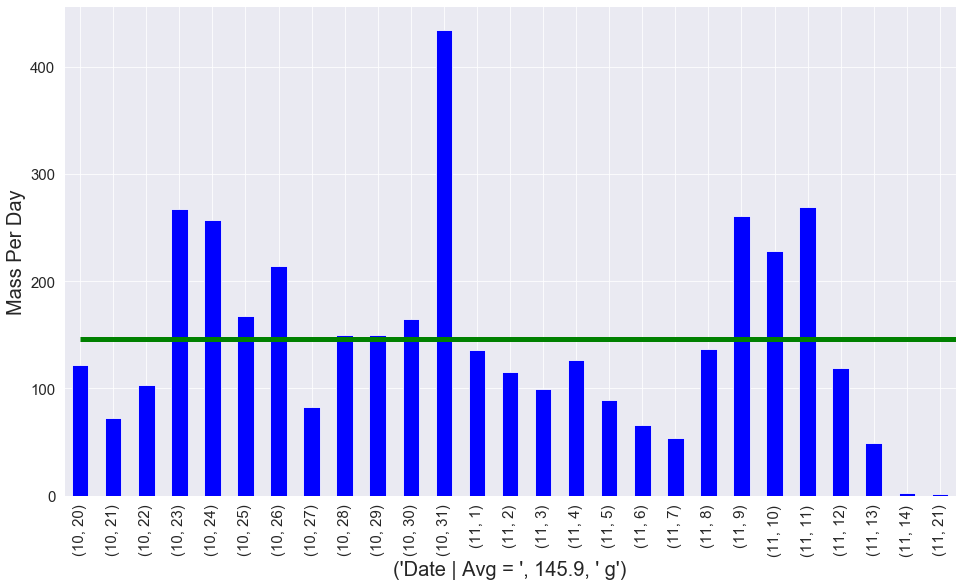

In [110]:
#*Total study leg mass per day

df6 = pd.DataFrame()  #clear any data
df7 = pd.DataFrame()  #clear any data
         
df6 = df2.mass.groupby([df2["month"],df2["day"]]).sum()
# df7 = df6.groupby(['day']).mean()
avgMassPerDay = round(df6.mean(),1)
# print (df6)
print('avg mass per day = ',avgMassPerDay)

fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.hlines(avgMassPerDay, 0, 50,linewidth=5,color='green')
fig.set_size_inches(16,9)

xText='Date | Avg = ',avgMassPerDay,' g'
ax = df6.plot.bar(color="b")
ax.set_ylabel('Mass Per Day',fontsize=20)
# ax.set_xlabel('Month, Day',fontsize=20)
ax.set_xlabel(xText,fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

picname = dataDir + nameForImage + '_MassPerDay_Average' + '.png'
fig.savefig(picname, transparent=True)

Text(0.5, 229.7, 'Date')

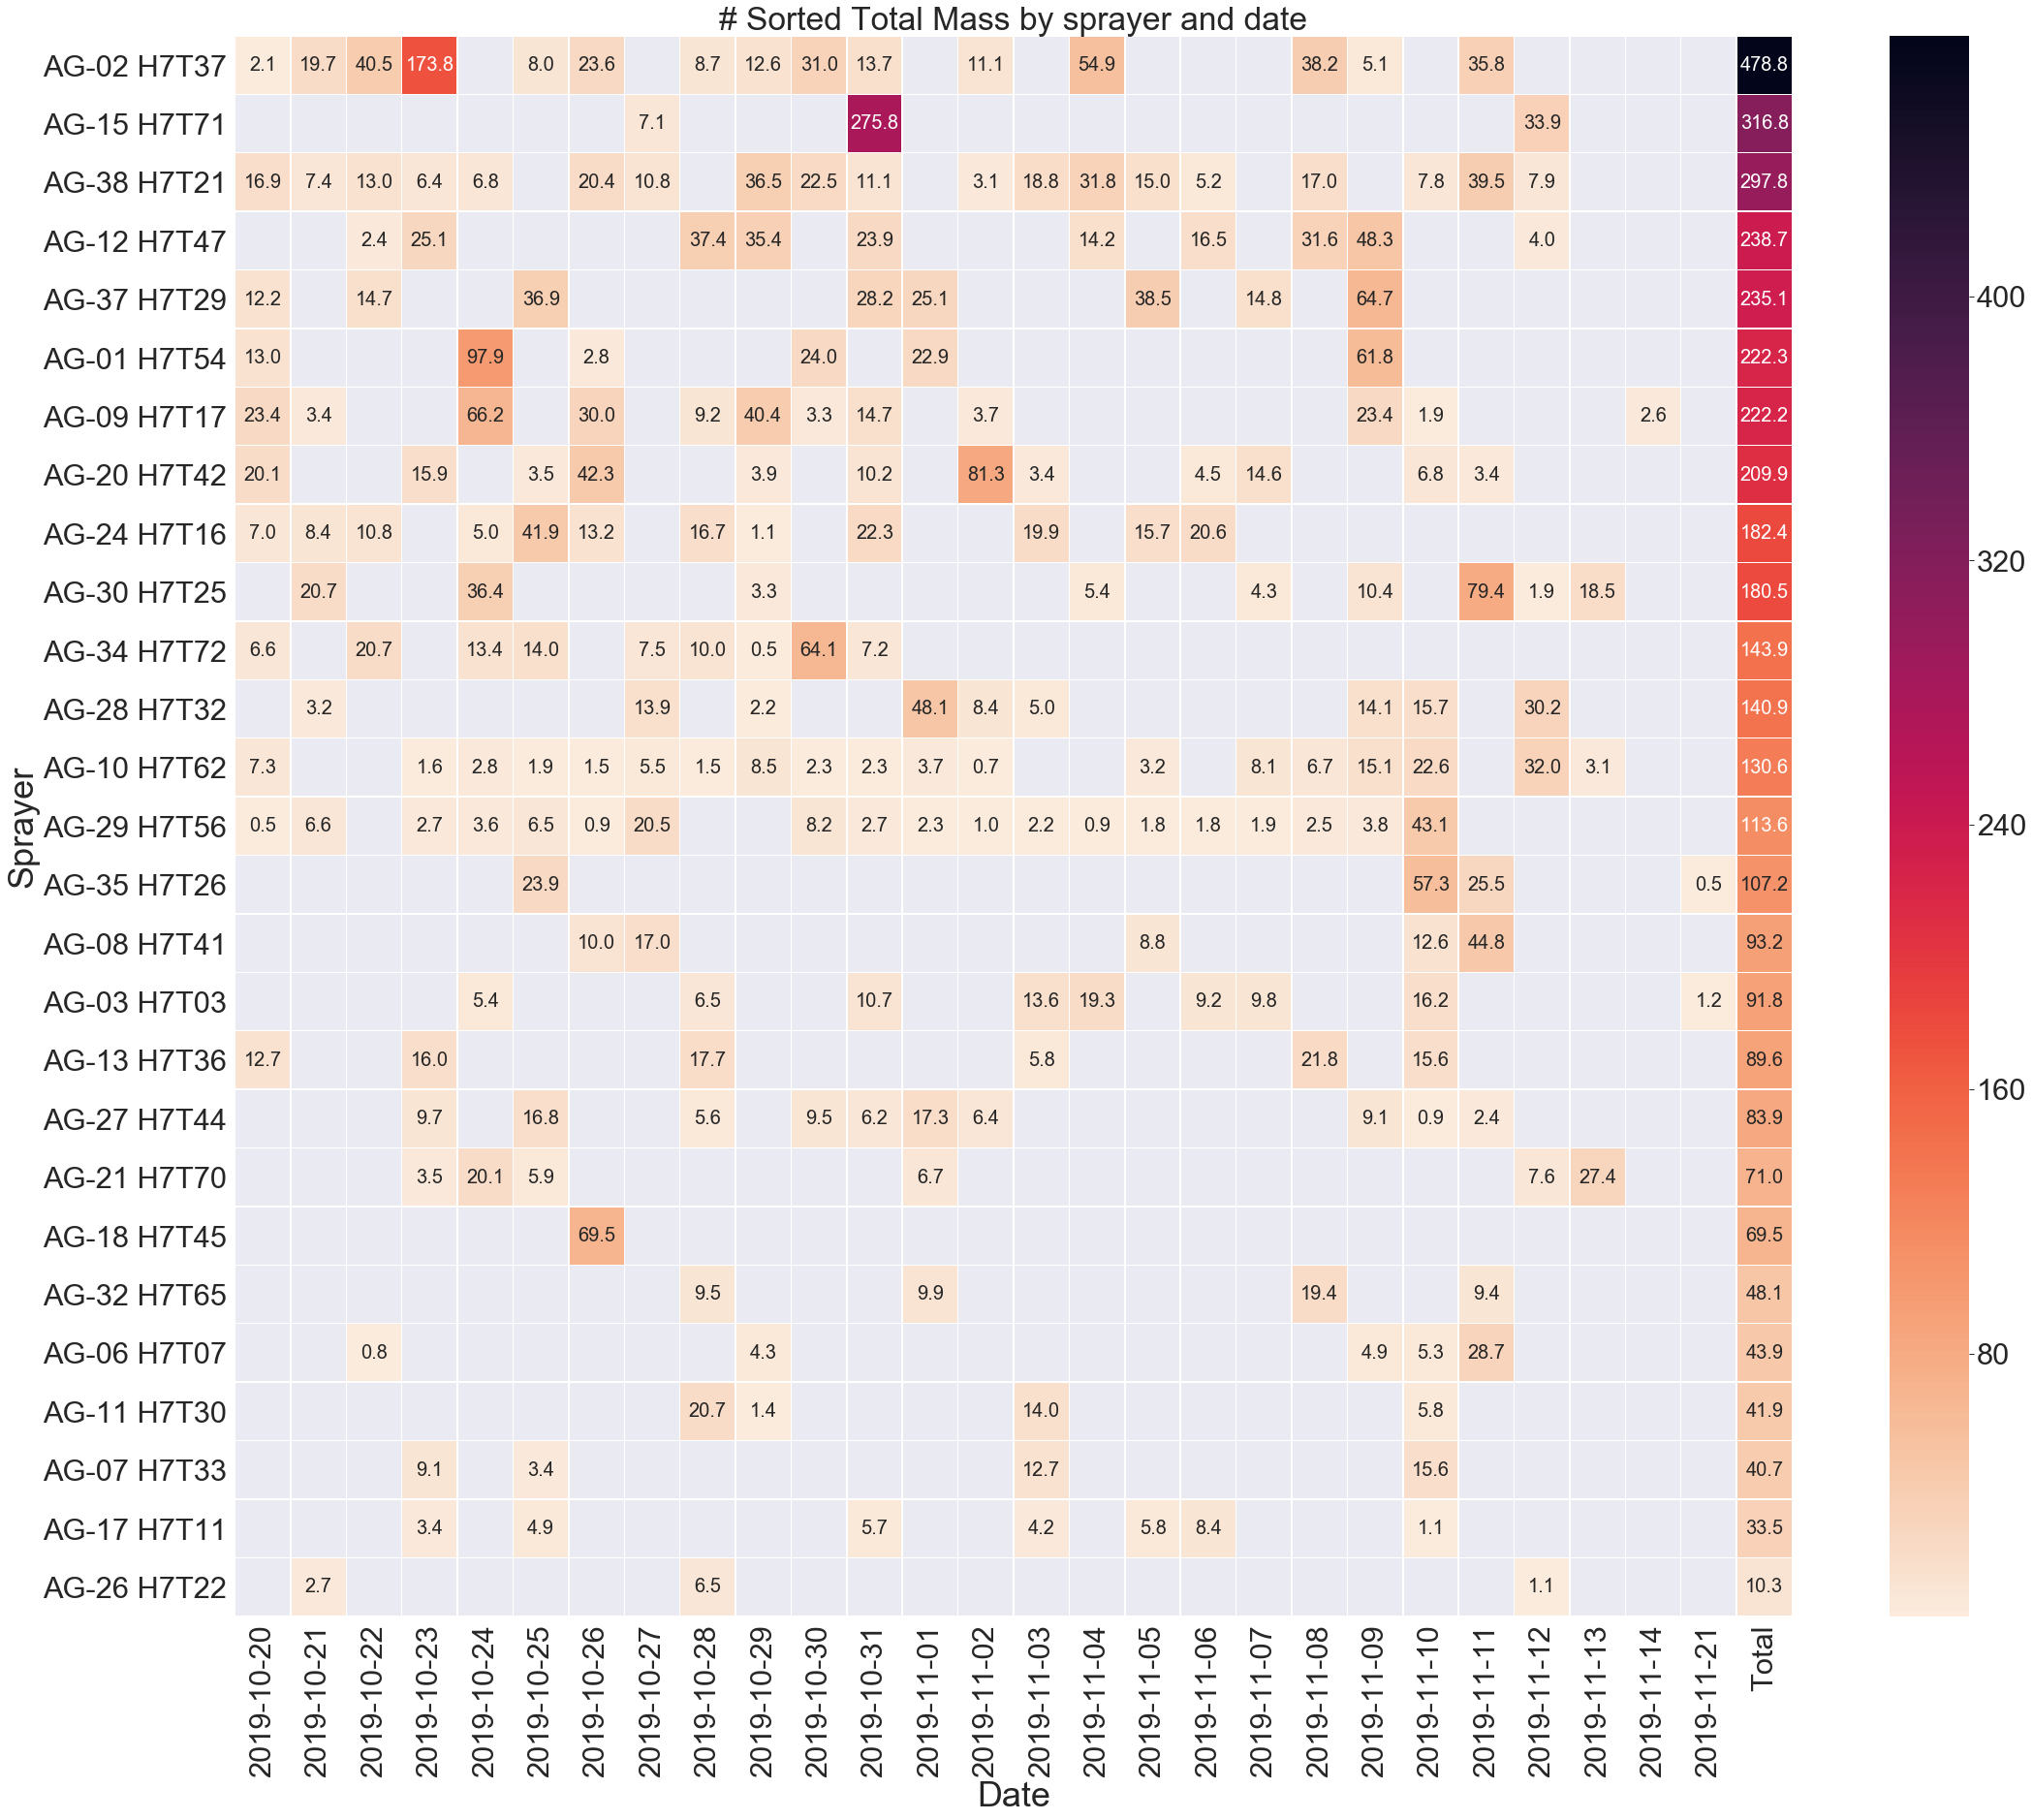

In [111]:

df8 = pd.DataFrame()  #clear any data
df9 = pd.DataFrame()  #clear any data
df13 = pd.DataFrame()  #clear any data

# print(df2)

df8 = df2.mass.groupby([df2["sprayer"], df2["date"]]).sum().reset_index()
df9 = df8.pivot("sprayer", "date", "mass")
df13 = df9.copy()

# df13.drop(df13.columns[0:3],axis=1, inplace=True)
# df13.drop(df13.columns[27:34],axis=1, inplace=True)

df13['Total'] = df13.sum(axis=1)
df13 = df13.sort_values('Total',ascending=False)

sns.set_context("paper", font_scale=3.5)
plt.rcParams.update({'font.size': 20})
# sns.set()
fig, ax = plt.subplots(figsize=(36, 30))
cmap = sns.cm.rocket_r

sns.heatmap(df13, cmap=cmap, annot=True, linewidths=.5, ax=ax,fmt='.1f').set_title('# Sorted Total Mass by sprayer and date')

ax.set_ylabel('Sprayer',fontsize=36)
ax.set_xlabel('Date',fontsize=36)


# picname = dataDir + nameForImage + '_UsageBySprayer_ByDay' + '.png'
# fig.savefig(picname, transparent=True)

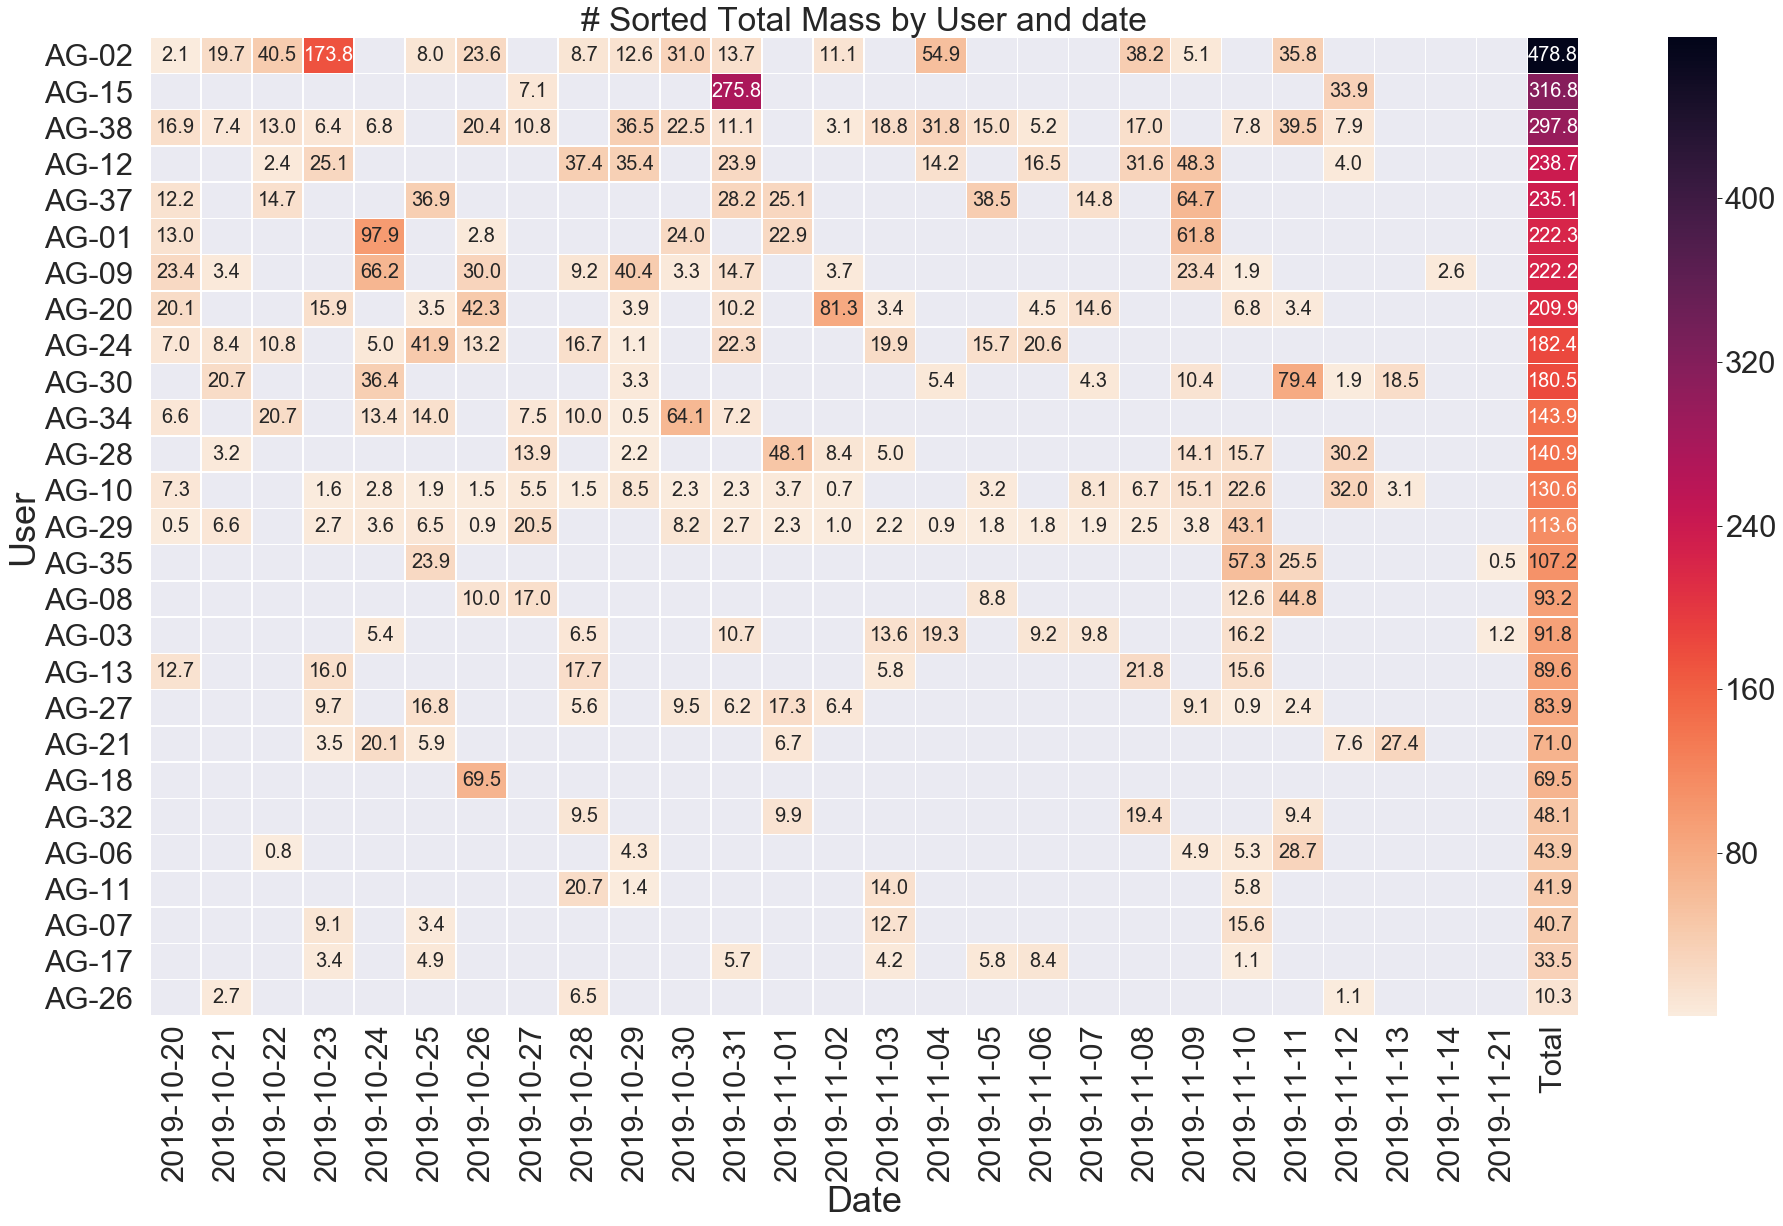

In [112]:

df8 = pd.DataFrame()  #clear any data
df9 = pd.DataFrame()  #clear any data
df13 = pd.DataFrame()  #clear any data

# print(df2)

df8 = df2.mass.groupby([df2["User"], df2["date"]]).sum().reset_index()
df9 = df8.pivot("User", "date", "mass")
df13 = df9.copy()

# df13.drop(df13.columns[0:3],axis=1, inplace=True)
# df13.drop(df13.columns[27:34],axis=1, inplace=True)

df13['Total'] = df13.sum(axis=1)
df13 = df13.sort_values('Total',ascending=False)

sns.set_context("paper", font_scale=3.5)
plt.rcParams.update({'font.size': 20})
# sns.set()
fig, ax = plt.subplots(figsize=(32,18))
cmap = sns.cm.rocket_r

sns.heatmap(df13, cmap=cmap, annot=True, linewidths=.5, ax=ax,fmt='.1f').set_title('# Sorted Total Mass by User and date')

ax.set_ylabel('User',fontsize=36)
ax.set_xlabel('Date',fontsize=36)


picname = dataDir + nameForImage + '_UsageByUser_ByDay' + '.png'
fig.savefig(picname, transparent=True)

4652
Int64Index([   6,   12,   15,   21,   30,   48,  121,  126,  129,  157,
            ...
            4607, 4613, 4617, 4623, 4632, 4635, 4639, 4641, 4644, 4648],
           dtype='int64', length=534)


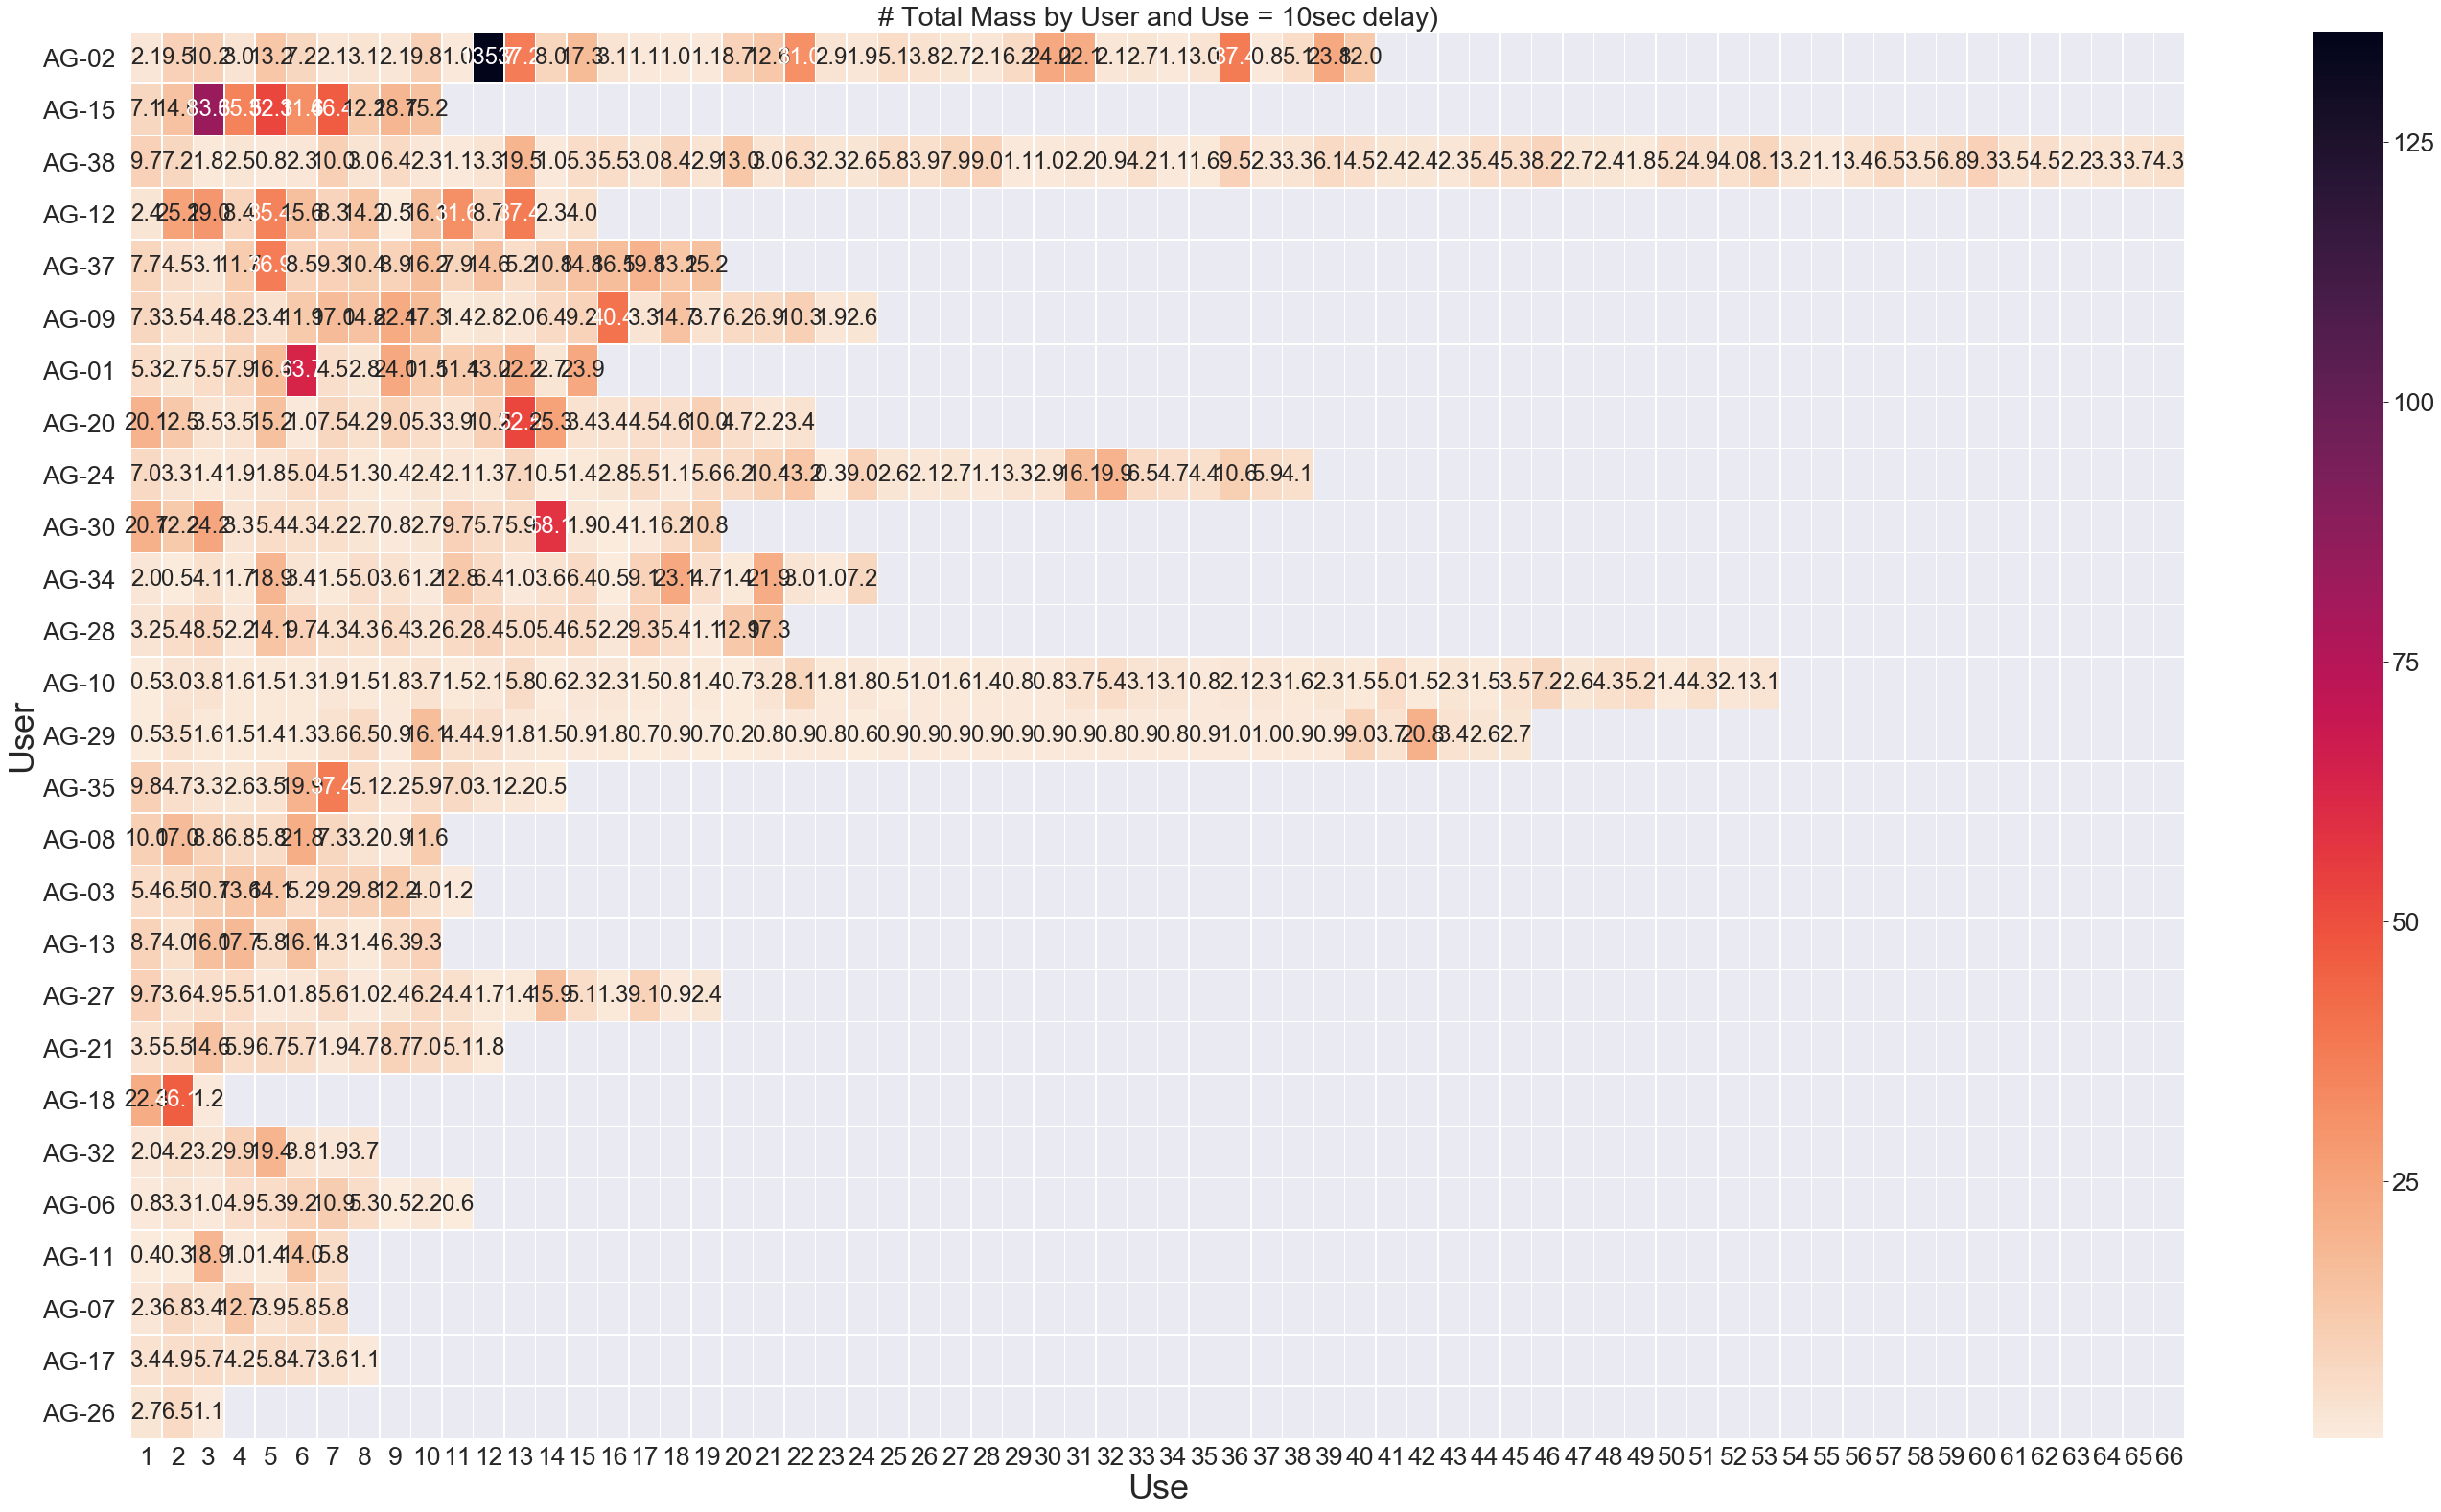

In [113]:
# create heatmap of uses per user (use = set of sprays with < certain time gap between each spray)

df8 = pd.DataFrame()  #clear any data
df9 = pd.DataFrame()
df13 = pd.DataFrame()
dfGap = pd.DataFrame()
dfGapInd1 = pd.DataFrame()
dfGapInd2 = pd.DataFrame()
dfUse = pd.DataFrame()
dfUse1 = pd.DataFrame()
dfUseTot = pd.DataFrame()

UseCut=10    #second gap between sprays to consider a separate use

# create table with user, mass of each spray, datetime, and seconds delay between previous spray
# print(df2)
dfGap=df2.filter(['User','sprayer','mass','datetime','gap'])
dfGap.sort_values(by=['User','datetime'], inplace=True)
dfGap['gap'] = dfGap['datetime'].diff().dt.total_seconds()
# dfGap=dfGap.dropna()
dfGap.reset_index(inplace=True)

# find indexes of sprays with a time gap over the cutoff defined above = useCut
# find sprays with negative gap--since df is grouped by user then time, a negative time = next user
dfGapInd1 = dfGap[(dfGap['gap']>UseCut) | (dfGap['gap']<-1)]
dfGapInd2=dfGapInd1.index #create the list
print(len(dfGap))
# print(dfGap)
# print(len(dfGapInd2))
print(dfGapInd2)

# fig1, ax2 = plt.subplots(1,1) #Add subplot to figure
# plt.scatter(dfGap['sprayer'],dfGap['gap'], s=5, c='r')
# fig1.set_size_inches(16,9)

indexStart=0
indexEnd=0
useCnt=1

# cycle through each use index defined above(start of use) to the next index (end of use)
#   all sprays within these indexes are grouped to describe the use
for i in range(0 ,len(dfGapInd2)):
#     print(i,dfGapInd2[i],len(dfGapInd2))    
    indexStart=dfGapInd2[i]
    if i == len(dfGapInd2)-1: # define the end as the last index in the table for the last index in the list
        indexEnd=len(dfGap)
    else:
        indexEnd=dfGapInd2[i+1]  # otherwise the end is the next index in the list
        
#     print(indexStart)
#     print(indexEnd)
#   add a column to assign use count to each spray 
    dfUse=dfGap.iloc[indexStart:indexEnd]
    dfUse1=dfUse.copy()
    dfUse1['Use']= useCnt
#     print(dfUse1)
    dfUseTot=dfUseTot.append(dfUse1)  # reassemble the table with each use count
    
    #  unless it is the last index in the list; reset the use counter if the next use index is a different user
    if i != len(dfGapInd2)-1:  
        if dfGap['User'].iloc[indexStart]!=dfGap['User'].iloc[indexEnd]:
            useCnt=1
        else:
            useCnt+=1

# print(dfGap)
# print(dfUseTot)

#Group the table by user, use, and sum of all sprays in use
df30 = dfUseTot.mass.groupby([dfUseTot["User"], dfUseTot["Use"]]).sum().reset_index()
df31 = df30.pivot("User", "Use", "mass")
df32 = df31.copy()

#create total column to sort by total mass, but remove so color map is based on min and max mass of use not total mass
df32['Total'] = df32.sum(axis=1)
df32 = df32.sort_values('Total',ascending=False)
df32.drop(['Total'],axis=1, inplace=True)

sns.set_context("paper", font_scale=3)
plt.rcParams.update({'font.size': 24})
# sns.set()
fig, ax = plt.subplots(figsize=(48,27))
cmap = sns.cm.rocket_r

sns.heatmap(df32, cmap=cmap, annot=True, linewidths=.5, ax=ax,fmt='.1f').set_title('# Total Mass by User and Use = 10sec delay)')

ax.set_ylabel('User',fontsize=36)
ax.set_xlabel('Use',fontsize=36)

# excelextension = '.xlsx'
# exceljoinedfilename = dataDir+'_Gap'+excelextension
# writer = ExcelWriter(exceljoinedfilename) #set file name
# dfGap.to_excel(writer,'Sheet2') #Write df4 data table to sheet 1 of file
# writer.save() #save file

picname = dataDir + nameForImage + '_UsageByUser_ByUse' + '.png'
fig.savefig(picname, transparent=True)

Text(0.5, 212.7, 'Use')

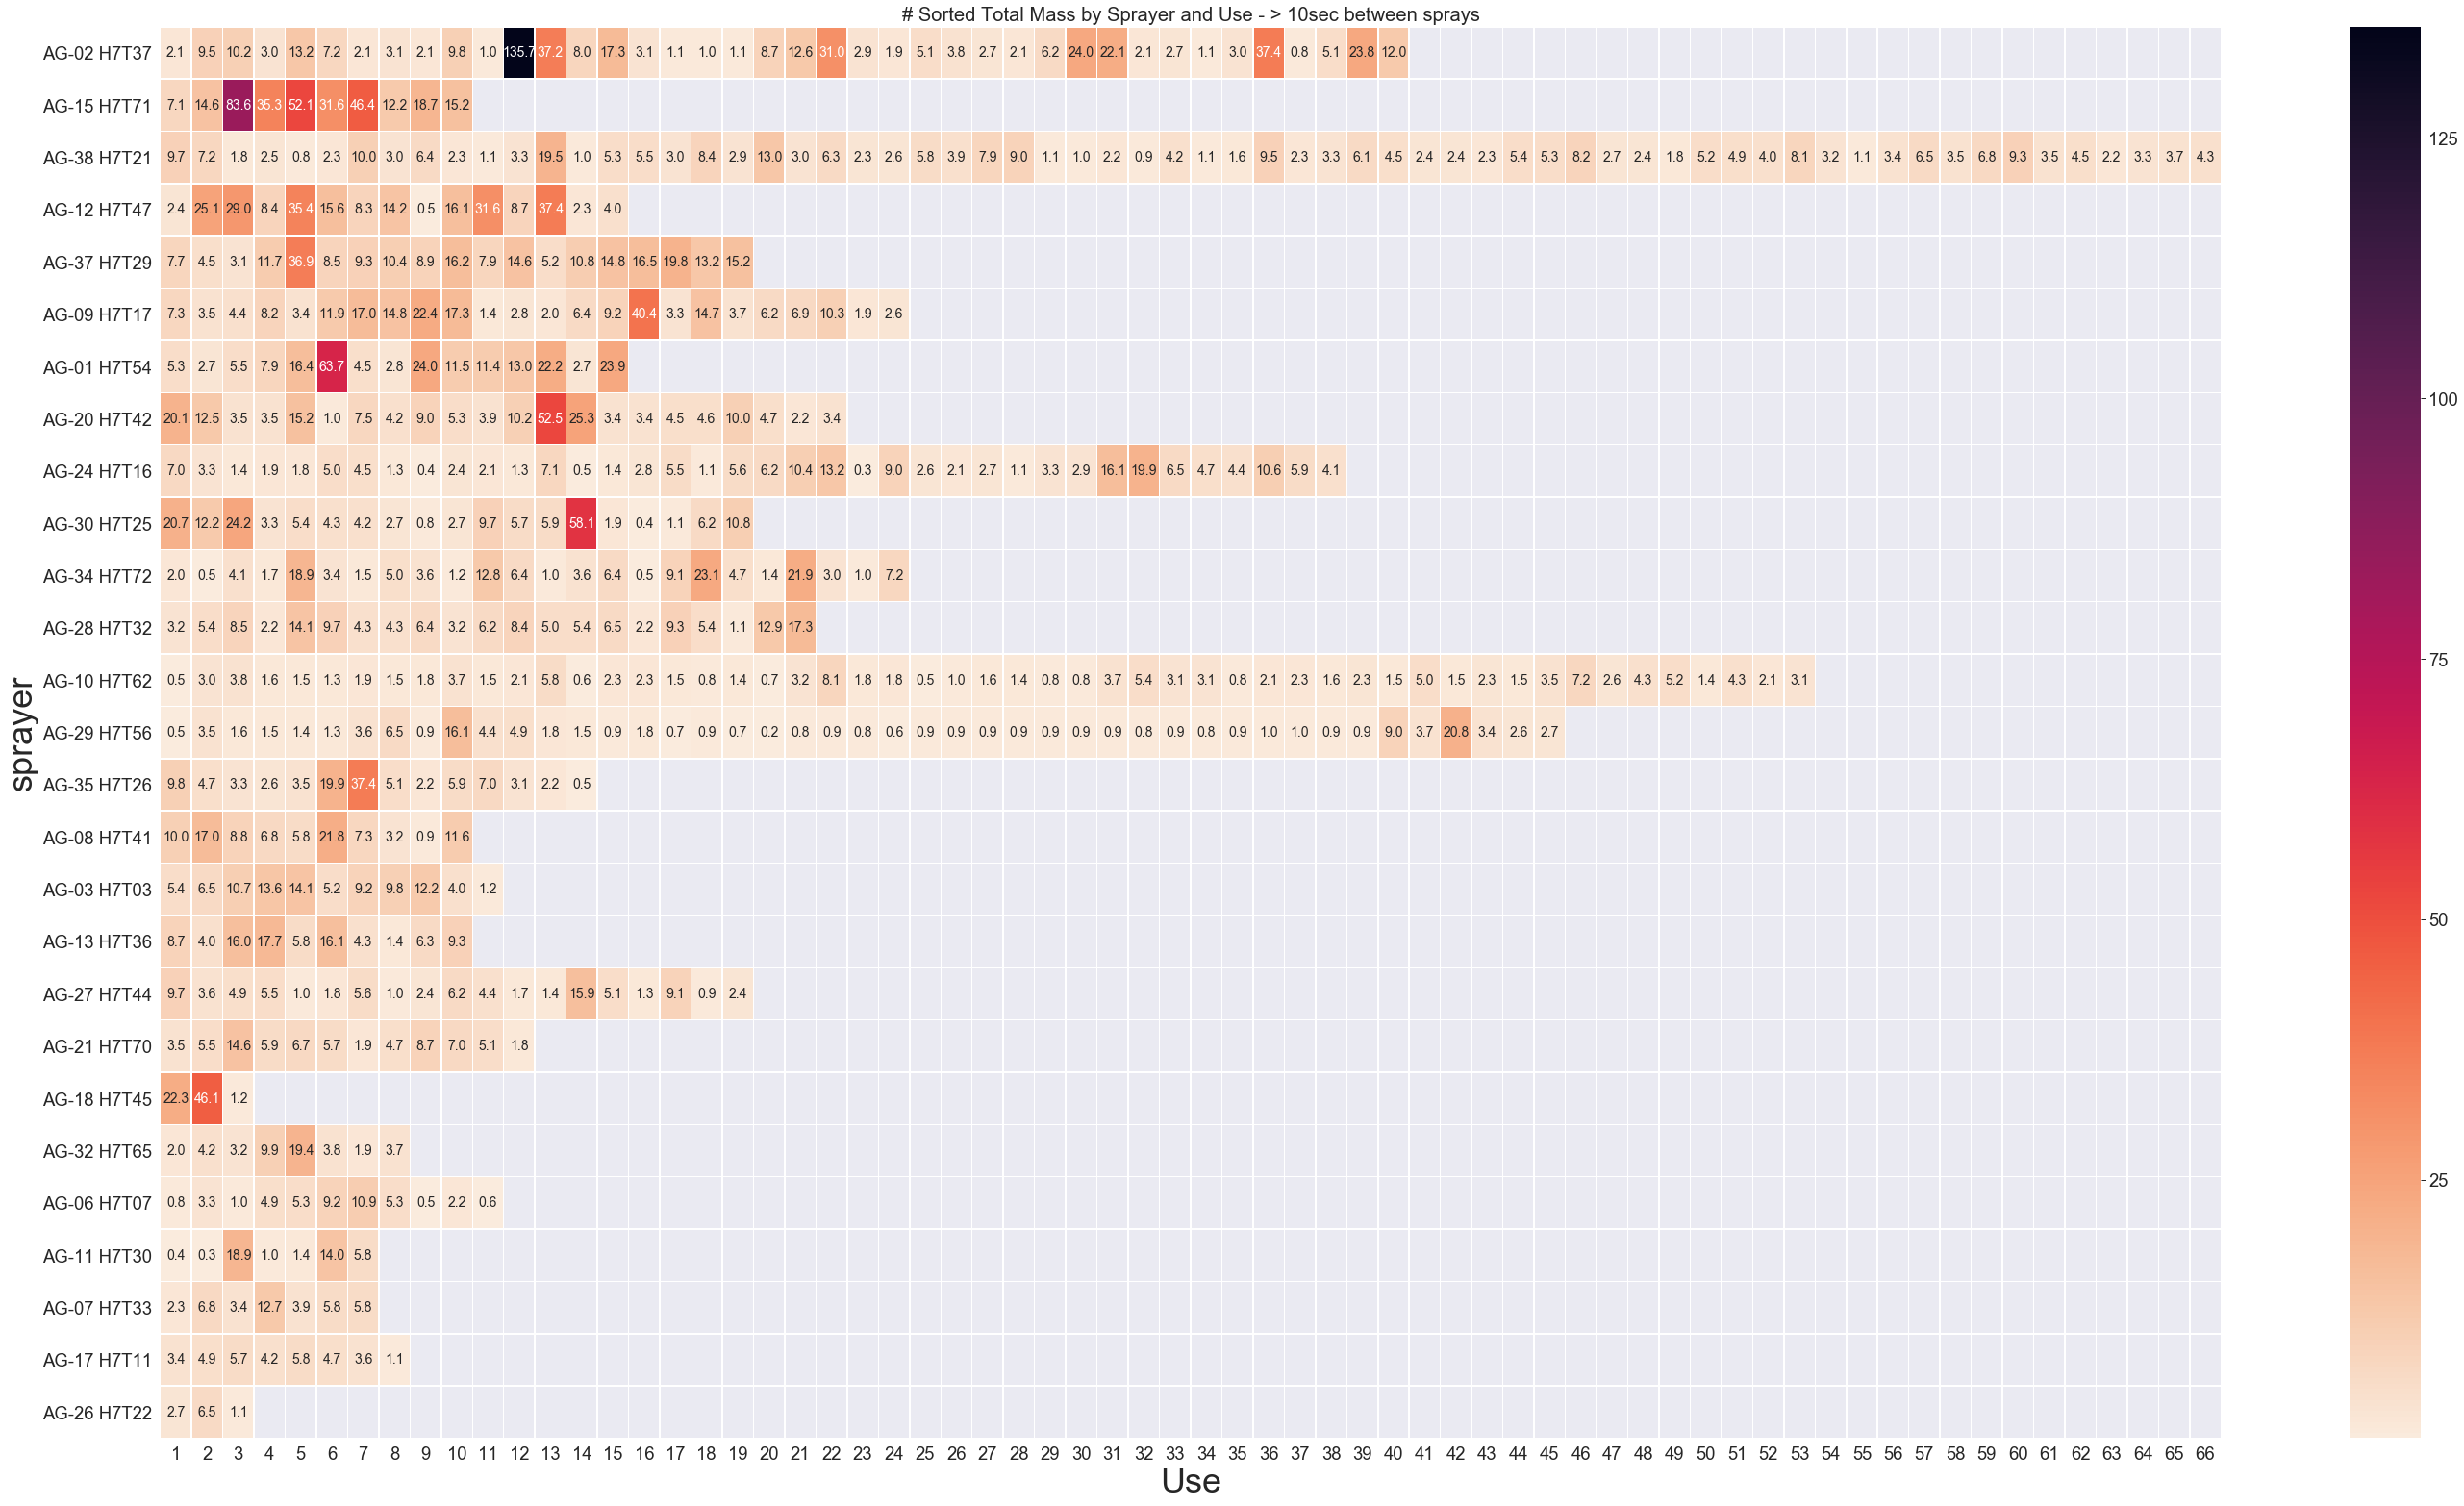

In [114]:
# repeat by sprayer ID instead of user---only necessary if users assign multiple sprayers

df8 = pd.DataFrame()  #clear any data
df9 = pd.DataFrame()
df13 = pd.DataFrame()
dfGap = pd.DataFrame()
dfGapInd1 = pd.DataFrame()
dfGapInd2 = pd.DataFrame()
dfUse = pd.DataFrame()
dfUse1 = pd.DataFrame()
dfUseTot = pd.DataFrame()
df30 = pd.DataFrame()
df31 = pd.DataFrame()
df32 = pd.DataFrame()

UseCut=10   #second gap to consider a separate use

# print(df2)
dfGap=df2.filter(['User','sprayer','mass','datetime','gap'])
dfGap.sort_values(by=['sprayer','datetime'], inplace=True)
dfGap['gap'] = dfGap['datetime'].diff().dt.total_seconds()
dfGap.reset_index(inplace=True)

dfGapInd1 = dfGap[(dfGap['gap']>UseCut) | (dfGap['gap']<-1)]
dfGapInd2=dfGapInd1.index
# print(dfGapInd2)

indexStart=0
indexEnd=0
useCnt=1

for i in range(0 ,len(dfGapInd2)):  
    indexStart=dfGapInd2[i]
    if i == len(dfGapInd2)-1:
        indexEnd=len(dfGap)
    else:
        indexEnd=dfGapInd2[i+1]
        
    dfUse=dfGap.iloc[indexStart:indexEnd]
    dfUse1=dfUse.copy()
    dfUse1['Use']= useCnt
    dfUseTot=dfUseTot.append(dfUse1)
    
    if i != len(dfGapInd2)-1:        
        if dfGap['sprayer'].iloc[indexStart]!=dfGap['sprayer'].iloc[indexEnd]:
            useCnt=1
        else:
            useCnt+=1

# print(dfUseTot)
df30 = dfUseTot.mass.groupby([dfUseTot["sprayer"], dfUseTot["Use"]]).sum().reset_index()
df31 = df30.pivot("sprayer", "Use", "mass")
df32 = df31.copy()

df32['Total'] = df32.sum(axis=1)
df32 = df32.sort_values('Total',ascending=False)
df32.drop(['Total'],axis=1, inplace=True)

sns.set_context("paper", font_scale=2.1)
plt.rcParams.update({'font.size': 14})
# sns.set()
fig, ax = plt.subplots(figsize=(48,27))
cmap = sns.cm.rocket_r

sns.heatmap(df32, cmap=cmap, annot=True, linewidths=.5, ax=ax,fmt='.1f').set_title('# Sorted Total Mass by Sprayer and Use - > 10sec between sprays')

ax.set_ylabel('sprayer',fontsize=36)
ax.set_xlabel('Use',fontsize=36)

# excelextension = '.xlsx'
# exceljoinedfilename = dataDir+'_Gap'+excelextension
# writer = ExcelWriter(exceljoinedfilename) #set file name
# dfGap.to_excel(writer,'Sheet2') #Write df4 data table to sheet 1 of file
# writer.save() #save file

# picname = dataDir + nameForImage + '_UsageBySprayer_ByUse' + '.png'
# fig.savefig(picname, transparent=True)

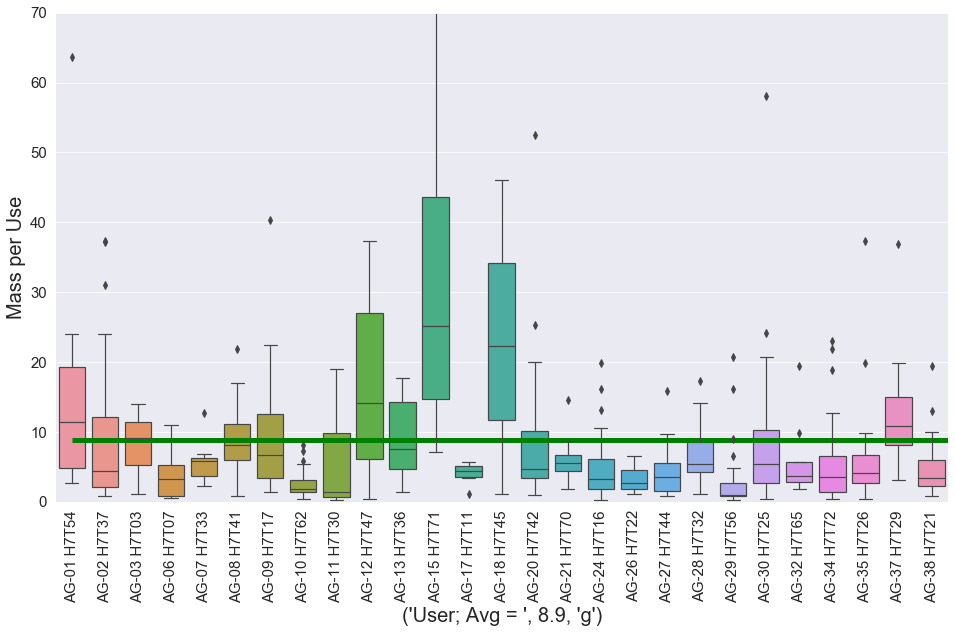

In [115]:

#box plot each use by user and mass

dfUseSummary = pd.DataFrame()
# df30('useCount')
# dfUseTot
dfUseSummary['useCount']= df30.Use.groupby(df30['sprayer']).max()
dfUseSummary['useMassavg']=df30.mass.groupby(df30['sprayer']).mean()
# print(dfUseSummary)
# print(df30)
meanPerUse=round(dfUseSummary.useMassavg.mean(),1)
fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.hlines(meanPerUse, 0, 30,linewidth=5,color='green')
fig.set_size_inches(16,9)

ax=sns.boxplot(x="sprayer", y="mass", data=df30)
# ax=sns.swarmplot(x="User", y="spraydirectionscore", data=df30, color=".2", size=3)
ax.set_ylim([0, 70])
# ax.set_xlabel('User',fontsize=15)
ytext='Mass per Use'
ax.set_ylabel(ytext,fontsize=20)
xtext='User; Avg = ', meanPerUse, 'g'
ax.set_xlabel(xtext,fontsize=20)

plt.xticks(rotation=90,fontsize=15)
plt.yticks(rotation=0,fontsize=15)

picname = dataDir + nameForImage + '_MassPerUse_Box' + '.png'
fig.savefig(picname, transparent=True)

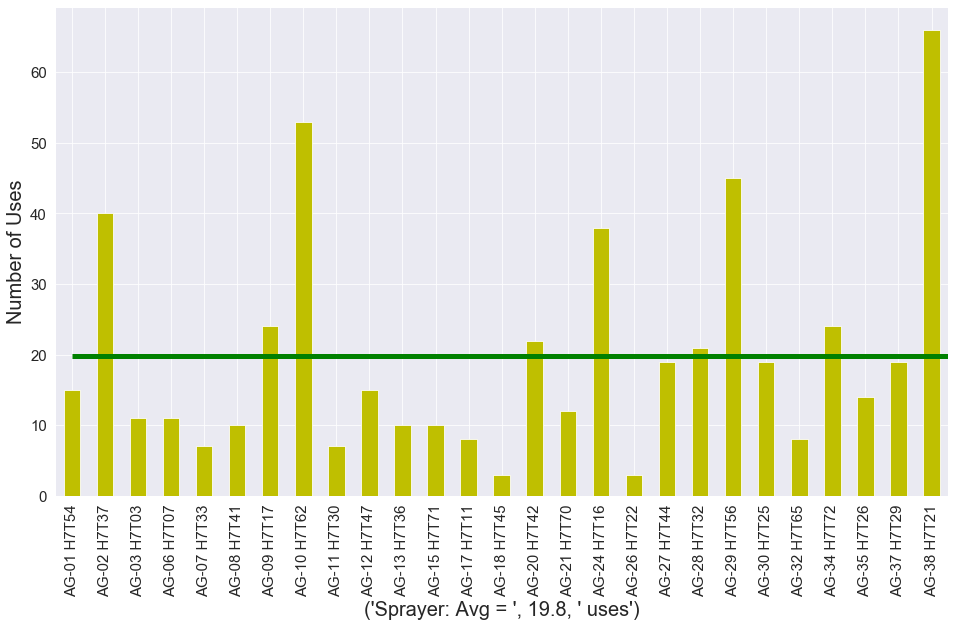

In [116]:

meanUses=round(dfUseSummary['useCount'].mean(),1)
fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.hlines(meanUses, 0, 30,linewidth=5,color='green')
fig.set_size_inches(16,9)

ax = dfUseSummary['useCount'].plot.bar(color='y')
# ax = bangbang['mass'].plot.bar(catcolor=(bangbang['color'])
# ax.bar(bangbang['sprayer'],bangbang['mass'],color=bangbang['color'])
ax.set_ylabel('Number of Uses',fontsize=20)
xtext='Sprayer: Avg = ', meanUses, ' uses'
ax.set_xlabel(xtext,fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

picname = dataDir + nameForImage + '_NumberOfUses' + '.png'
fig.savefig(picname, transparent=True)

avg mass per sprayer =  145.9


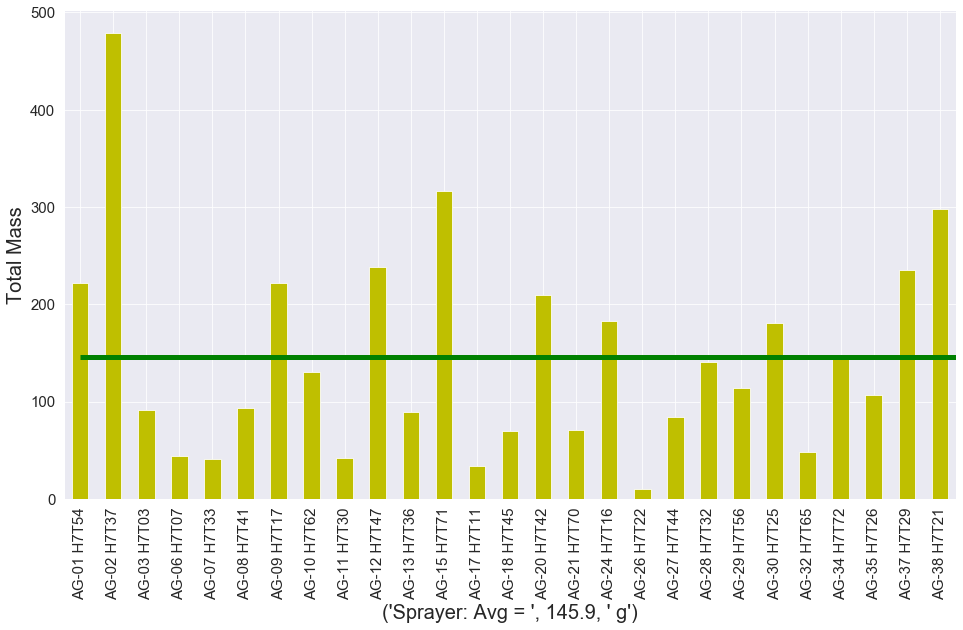

In [117]:
dfpoo = pd.DataFrame()  #clear any data
bangbang = pd.DataFrame()  #clear any data
bangbang2 = pd.DataFrame()  #clear any data

dfpoo = df2.copy()

# print(dfpoo)

# bangbang['mass'] = dfpoo.groupby('sprayer')['mass'].sum()
# bangbang['sprayer'] = dfpoo.groupby('sprayer')['sprayer']
bangbang['mass'] = dfpoo.groupby('sprayer').sum()['mass']
# bangbang['color'] = dfpoo.groupby('sprayer').mean()['User']/1000
# bangbang = bangbang[bangbang['mass']<200]
avgMassBySprayer =round(bangbang['mass'].mean(),1)
print('avg mass per sprayer = ' , avgMassBySprayer)

fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.hlines(avgMassBySprayer, 0, 50,linewidth=5,color='green')
fig.set_size_inches(16,9)

ax = bangbang['mass'].plot.bar(color='y')
# ax = bangbang['mass'].plot.bar(catcolor=(bangbang['color'])
# ax.bar(bangbang['sprayer'],bangbang['mass'],color=bangbang['color'])
ax.set_ylabel('Total Mass',fontsize=20)
xtext='Sprayer: Avg = ', avgMassBySprayer, ' g'
ax.set_xlabel(xtext,fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

picname = dataDir + nameForImage + '_TotalMassPerSprayer' + '.png'
fig.savefig(picname, transparent=True)

avg Strokes per sprayer =  172.0


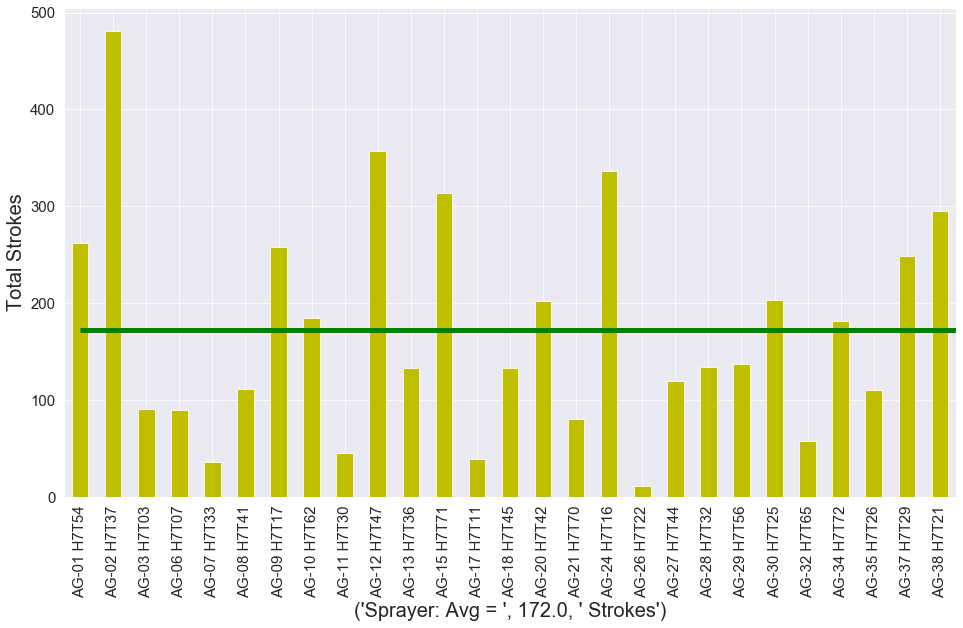

In [118]:
# dfpoo.dropna(subset=['vhall3'], inplace=True)
# dfpoo.groupby(['sprayer']).sum()
bangbang['strokes'] = dfpoo.groupby('sprayer').size()

avgStrokesBySprayer = round(bangbang['strokes'].mean(),0)
print('avg Strokes per sprayer = ' , avgStrokesBySprayer)

fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.hlines(avgStrokesBySprayer, 0, 50,linewidth=5,color='green')
fig.set_size_inches(16,9)

ax = bangbang['strokes'].plot.bar(color="y")
ax.set_ylabel('Total Strokes', fontsize=20)

xtext='Sprayer: Avg = ', avgStrokesBySprayer, ' Strokes'
ax.set_xlabel(xtext, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

picname = dataDir + nameForImage + '_StrokesBySprayer' + '.png'
fig.savefig(picname, transparent=True)

avg mass per spray =  0.85


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

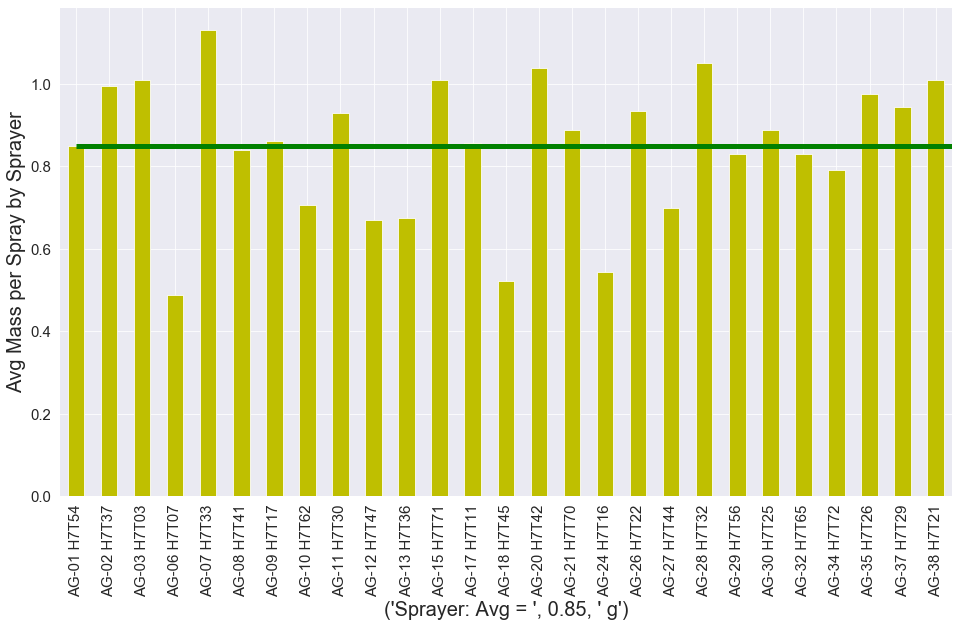

In [119]:

bangone = pd.DataFrame()  #clear any data

bangone['sum_mass'] = dfpoo.groupby('sprayer')['mass'].sum()
bangone['count_strokes'] = dfpoo.groupby('sprayer')['mass'].count()
bangone['avg_mass'] = bangone['sum_mass'] / bangone['count_strokes']

avgMassBySpray = round(bangone['avg_mass'].mean(),2)
print('avg mass per spray = ' , avgMassBySpray)
# print(bangone)

fig, ax = plt.subplots(1,1) #Add subplot to figure
plt.hlines(avgMassBySpray, 0, 50,linewidth=5,color='green')
fig.set_size_inches(16,9)

ax = bangone['avg_mass'].plot.bar(color="y")
ax.set_ylabel('Avg Mass per Spray by Sprayer', fontsize=20)
xtext='Sprayer: Avg = ', avgMassBySpray, ' g'
ax.set_xlabel(xtext, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# picname = dataDir + nameForImage + '_MassPerSprayBySprayer' + '.png'
# fig.savefig(picname, transparent=True)

In [120]:
averagemass = bangone['sum_mass'].mean()
print('average mass', averagemass, 'g')

average mass 145.8595251110321 g


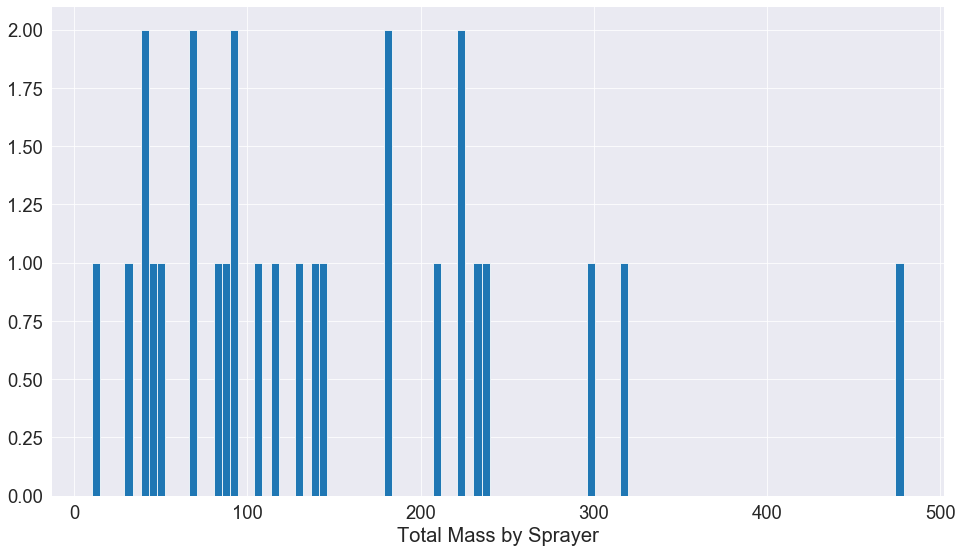

In [121]:

n_bins = 100
x_hist=bangone['sum_mass']

fig, ax = plt.subplots(figsize=(16,9))
n, bins, patches = ax.hist(x_hist, n_bins)

ax.set_xlabel('Total Mass by Sprayer')
plt.show()

# picname = dataDir + nameForImage + '_TotalMassbySprayer_hist' + '.png'
# fig.savefig(picname, transparent=True)

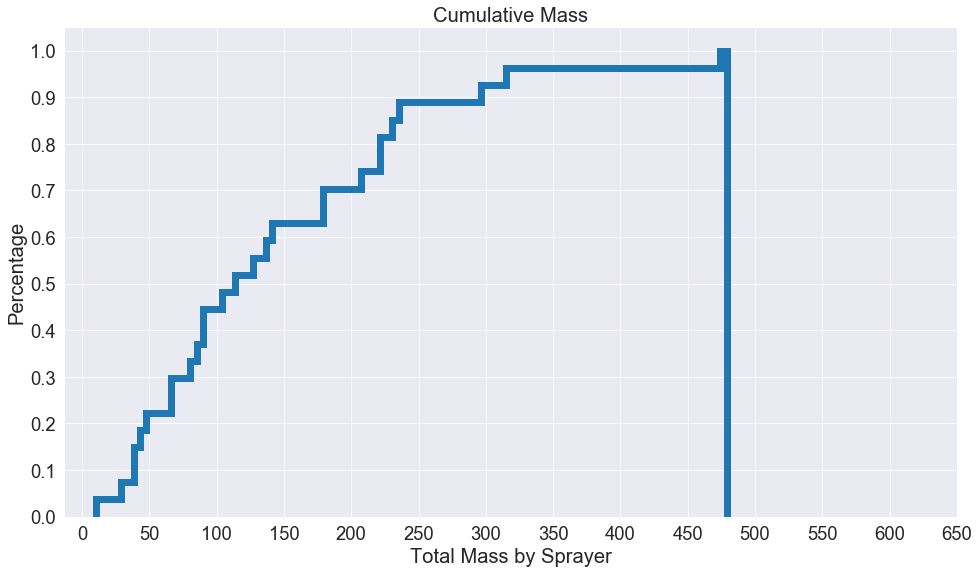

In [122]:

fig, ax = plt.subplots(figsize=(16,9))
n, bins, patches = ax.hist(x_hist, n_bins, density=True, histtype='step', cumulative=True, label='Cumulative',linewidth=7.0)

ax.set_title('Cumulative Mass')
ax.set_xlabel('Total Mass by Sprayer')
plt.xticks(np.arange(0, 700, 50))
ax.set_ylabel('Percentage')
plt.yticks(np.arange(0, 1.1, .10))
ax.grid(True)
plt.show()


picname = dataDir + nameForImage + '_TotalMassbySprayer_cumHist' + '.png'
fig.savefig(picname, transparent=True)